# PISA 2012 Exploration Analysis
## by Gabriel Barros

### Table of Contents
- [Preliminary Wrangling](#wrangle)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](#multi)
- [References](#ref)

<a name="wrangle"></a>
## Preliminary Wrangling

This document explores a dataset containing information for, approximately, 490,000 students who took part in the PISA 2012.

### Gather

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [2]:
types = {15: str, 16: str, 17: str, 21: str, 22: str, 23: str, 24: str, 25: str, 26: str, 30: str, 31: str, 36: str, 37: str, 45: str, 65: str, 123: str, 155: str, 156: str, 157: str, 158: str, 159: str, 160: str, 161: str, 162: str, 163: str, 164: str, 165: str, 166: str, 167: str, 168: str, 169: str, 170: str, 171: str, 284: str, 285: str, 286: str, 287: str, 288: str, 289: str, 290: str, 291: str, 292: str, 293: str, 294: str, 295: str, 296: str, 297: str, 298: str, 299: str, 300: str, 301: str, 302: str, 303: str, 307: str, 308: str, 309: str, 310: str, 311: str, 312: str, 313: str, 314: str, 315: str, 316: str, 317: str, 318: str, 319: str, 320: str, 321: str, 322: str, 323: str, 324: str, 325: str, 326: str, 327: str, 328: str, 329: str, 330: str, 331: str, 332: str, 333: str, 334: str, 335: str, 336: str, 337: str, 338: str, 339: str, 340: str, 341: str, 342: str, 343: str, 344: str, 345: str, 346: str, 347: str, 348: str, 349: str, 350: str, 351: str, 352: str, 353: str, 354: str, 355: str, 356: str, 357: str, 376: str, 377: str, 378: str, 379: str, 380: str, 381: str, 382: str, 383: str, 384: str, 385: str, 386: str, 387: str, 388: str, 389: str, 390: str, 391: str, 392: str, 393: str, 394: str, 395: str, 396: str, 397: str, 398: str, 399: str, 400: str, 401: str, 402: str, 403: str, 475: str}
df = pd.read_csv("pisa2012.csv", 
                 encoding="latin1",
                 dtype=types, 
                 index_col=0)

In [3]:
# Selecting columns of interest
columns = ["CNT", "OECD", "SCHOOLID", "STIDSTD", "AGE", "ST03Q01", "ST03Q02", "ST04Q01", "ST27Q01", "ST27Q02", "ST27Q03", "ST27Q04", "ST28Q01", "BFMJ2", "BMMJ1", "HISEI", "PARED", "PV1MATH", "PV2MATH", "PV3MATH", "PV4MATH", "PV5MATH", "PV1READ", "PV2READ", "PV3READ", "PV4READ", "PV5READ", "PV1SCIE", "PV2SCIE", "PV3SCIE", "PV4SCIE", "PV5SCIE"]
df = df[columns]

In [4]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

### Assess

#### PISA 2012

In [5]:
df.head()

CNT      OECD  SCHOOLID  STIDSTD    AGE  ST03Q01  ST03Q02 ST04Q01  \
1  Albania  Non-OECD         1        1  16.17        2     1996  Female   
2  Albania  Non-OECD         1        2  16.17        2     1996  Female   
3  Albania  Non-OECD         1        3  15.58        9     1996  Female   
4  Albania  Non-OECD         1        4  15.67        8     1996  Female   
5  Albania  Non-OECD         1        5  15.50       10     1996  Female   

         ST27Q01        ST27Q02  ...   PV1READ   PV2READ   PV3READ   PV4READ  \
1            Two            One  ...  249.5762  254.3420  406.8496  175.7053   
2  Three or more  Three or more  ...  406.2936  349.8975  400.7334  369.7553   
3  Three or more            Two  ...  401.2100  404.3872  387.7067  431.3938   
4  Three or more            Two  ...  547.3630  481.4353  461.5776  425.0393   
5            Two            One  ...  311.7707  141.7883  293.5015  272.8495   

    PV5READ   PV1SCIE   PV2SCIE   PV3SCIE   PV4SCIE   PV5SCIE  
1  218.5981  341.7009  408.8400  348.2283  367.8105  392.9877  
2  396.7618  548.9929  471.5964  471.5964  443.6218  454.8116  
3  401.2100  499.6643  428.7952  492.2044  512.7191  499.6643  
4  471.9036  438.6796  481.5740  448.9370  474.1141  426.5573  
5  260.1405  361.5628  275.7740  372.7527  403.5248  422.1746  

[5 rows x 32 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 32 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CNT       485490 non-null  object 
 1   OECD      485490 non-null  object 
 2   SCHOOLID  485490 non-null  int64  
 3   STIDSTD   485490 non-null  int64  
 4   AGE       485374 non-null  float64
 5   ST03Q01   485490 non-null  int64  
 6   ST03Q02   485490 non-null  int64  
 7   ST04Q01   485490 non-null  object 
 8   ST27Q01   477079 non-null  object 
 9   ST27Q02   476548 non-null  object 
 10  ST27Q03   473459 non-null  object 
 11  ST27Q04   472499 non-null  object 
 12  ST28Q01   473765 non-null  object 
 13  BFMJ2     416150 non-null  float64
 14  BMMJ1     364814 non-null  float64
 15  HISEI     450621 non-null  float64
 16  PARED     473091 non-null  float64
 17  PV1MATH   485490 non-null  float64
 18  PV2MATH   485490 non-null  float64
 19  PV3MATH   485490 non-null  float64
 20  PV4M

- Missing values

In [7]:
df.isnull().sum()[df.isnull().sum() != 0]

AGE           116
ST27Q01      8411
ST27Q02      8942
ST27Q03     12031
ST27Q04     12991
ST28Q01     11725
BFMJ2       69340
BMMJ1      120676
HISEI       34869
PARED       12399
dtype: int64

- Categorical variables

In [8]:
df.ST27Q01.unique()

array(['Two', 'Three or more', 'One', nan, 'None'], dtype=object)

In [9]:
df.ST27Q02.unique()

array(['One', 'Three or more', 'Two', nan, 'None'], dtype=object)

In [10]:
df.ST27Q03.unique()

array(['None', 'Three or more', 'Two', 'One', nan], dtype=object)

In [11]:
df.ST27Q04.unique()

array(['None', 'Two', 'One', 'Three or more', nan], dtype=object)

In [12]:
df.ST28Q01.unique()

array(['0-10 books ', '201-500 books ', 'More than 500 books',
       '11-25 books ', '101-200 books ', '26-100 books ', nan],
      dtype=object)

- Column names

In [13]:
df.columns

Index(['CNT', 'OECD', 'SCHOOLID', 'STIDSTD', 'AGE', 'ST03Q01', 'ST03Q02',
       'ST04Q01', 'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q04', 'ST28Q01',
       'BFMJ2', 'BMMJ1', 'HISEI', 'PARED', 'PV1MATH', 'PV2MATH', 'PV3MATH',
       'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',
       'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'],
      dtype='object')

- Unique values in the country column

In [14]:
df.CNT.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

- Duplicate rows

In [15]:
df.duplicated().sum()

0

- HISEI column

In [16]:
df.HISEI.isnull().sum()

34869

In [17]:
df[df.CNT == "Albania"].HISEI.unique()

array([nan])

- Months of birth

In [18]:
df.ST03Q01.value_counts()

8     42696
7     42106
5     41623
9     41474
10    41466
3     40236
1     40172
6     40064
4     39859
12    39721
11    38999
2     36958
99      116
Name: ST03Q01, dtype: int64

- Years of birth

In [19]:
df.ST03Q02.value_counts()

1996    451476
1997     34014
Name: ST03Q02, dtype: int64

### World (geopandas)

In [20]:
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [21]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


- Diferent country names between the dataset (df) and the world dataframe (geopandas)

In [22]:
world_countries = world.name.unique()
for country in df.CNT.unique():
    if not country in world_countries:
        print(country)

Czech Republic
Hong Kong-China
Korea
Liechtenstein
Macao-China
China-Shanghai
Perm(Russian Federation)
Florida (USA)
Connecticut (USA)
Massachusetts (USA)
Russian Federation
Singapore
Slovak Republic
Chinese Taipei


Does not exist in the world dataframe:
- Singapore
- Liechtenstein

Need to change:
- Czech Republic -> Czechia
- Hong Kong-China -> China
- Korea -> South Korea
- Macao-China -> China
- China-Shanghai -> China
- Perm(Russian Federation) -> Russia
- Russian Federation -> Russia
- Slovak Republic -> Slovakia
- Florida (USA) -> United States of America
- Connecticut (USA) -> United States of America
- Massachusetts (USA) -> United States of America
- Chinese Taipei -> Taiwan

#### Assessments
- Missing categorical values in the ST27Q01 (phones), ST27Q02 (televisions), ST27Q03 (computers), ST27Q04 (cars), and ST28Q01 (books) columns.
- Missing numercic values in the AGE (age), BFMJ2 (father_isei), BMMJ1 (mother_isei), HISEI (highest_isei), and PARED (highest_parents_educ) columns. 
- The month of birth column (ST03Q01) has an impossible value (month 99).
- The HISEI (highest_isei) column should have the highest vaule between BFMJ2 (father_isei) and BMMJ1 (mother_isei).
- Erroneous data type:
    - SCHOOLID (school_id) and STIDSTD (student_id): string
    - OECD (OECD_country) and ST04Q01 (gender): categorical (nominal)
    - ST27Q01 (phones), ST27Q02 (televisions), ST27Q03 (computers), ST27Q04 (cars), and ST28Q01 (books): categorical (ordinal)
- Column names aren't intuitive.
- There are some country names that are different from the PISA 2012 dataset to the names in the world dataframe.
- Categories in the column ST28Q01 (books) are badly formatted.

### Clean

In [23]:
df_clean = df.copy()

#### Column names aren't intuitive.

#### Define
Rename the column names using the _rename_ function.

#### Code

In [24]:
column_names = {"CNT": "country", 
                "OECD": "OECD_country", 
                "SCHOOLID": "school_id",
                "STIDSTD": "student_id", 
                "ST03Q01": "month_birth", 
                "ST03Q02": "year_birth", 
                "ST04Q01": "gender", 
                "ST27Q01": "phones", 
                "ST27Q02": "televisions", 
                "ST27Q03": "computers", 
                "ST27Q04": "cars",  
                "ST28Q01": "books",
                "AGE": "age", 
                "BFMJ2": "father_isei", 
                "BMMJ1": "mother_isei", 
                "HISEI": "highest_isei", 
                "PARED": "highest_parents_educ"}

df_clean.rename(column_names, axis=1, inplace=True)

In [25]:
for column in df_clean.columns:
    if "PV" in column:
        new_col = column.lower()
        new_col = f"{new_col[:3]}_{new_col[3:]}"
        df_clean.rename({column: new_col}, axis=1, inplace=True)

#### Test

In [26]:
df_clean.columns

Index(['country', 'OECD_country', 'school_id', 'student_id', 'age',
       'month_birth', 'year_birth', 'gender', 'phones', 'televisions',
       'computers', 'cars', 'books', 'father_isei', 'mother_isei',
       'highest_isei', 'highest_parents_educ', 'pv1_math', 'pv2_math',
       'pv3_math', 'pv4_math', 'pv5_math', 'pv1_read', 'pv2_read', 'pv3_read',
       'pv4_read', 'pv5_read', 'pv1_scie', 'pv2_scie', 'pv3_scie', 'pv4_scie',
       'pv5_scie'],
      dtype='object')

#### There are some country names that are different from the PISA 2012 dataset to the names in the world dataframe.

#### Define
Replace the country names with problems.

#### Code

In [27]:
countries = {"Hong Kong-China": "China",
             "China-Shanghai": "China",
             "Chinese Taipei": "Taiwan", 
             "Macao-China": "China",
             "Perm(Russian Federation)": "Russia",
             "Russian Federation": "Russia",
             "Florida (USA)": "United States of America", 
             "Connecticut (USA)": "United States of America", 
             "Massachusetts (USA)": "United States of America",
             "Czech Republic": "Czechia", 
             "Slovak Republic": "Slovakia",
             "Korea": "South Korea"}

df_clean.country.replace(countries, inplace=True)

#### Test

In [28]:
df_clean.country.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czechia',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'China', 'Croatia', 'Hungary',
       'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Jordan',
       'Japan', 'Kazakhstan', 'South Korea', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Latvia', 'Mexico', 'Montenegro', 'Malaysia',
       'Netherlands', 'Norway', 'New Zealand', 'Peru', 'Poland',
       'Portugal', 'Qatar', 'Russia', 'United States of America',
       'Romania', 'Singapore', 'Serbia', 'Slovakia', 'Slovenia', 'Sweden',
       'Taiwan', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay', 'Vietnam'],
      dtype=object)

In [29]:
world_countries = world.name.unique()
for country in df_clean.country.unique():
    if not country in world_countries:
        print(country)

Liechtenstein
Singapore


#### Missing categorical values in the ST27Q01 (phones), ST27Q02 (televisions), ST27Q03 (computers), ST27Q04 (cars), and ST28Q01 (books) columns.

#### Define
Since there are a small number of missing values in the 5 categorical columns, when compared to the DataFrame, I will drop the rows with missing values in those columns.

#### Code

In [30]:
#Categorical columns with missing values
columns = ["phones", "computers", "televisions", "cars", "books"]
for column in columns:
    df_clean = df_clean[df_clean[column].notnull()]

#### Test

In [31]:
df_clean.isnull().sum()[df_clean.isnull().sum() != 0]

age                        108
father_isei              60113
mother_isei             108716
highest_isei             26857
highest_parents_educ      7141
dtype: int64

#### Missing numercic values in the AGE (age), BFMJ2 (father_isei), BMMJ1 (mother_isei), HISEI (highest_isei), and PARED (highest_parents_educ) columns.

#### Define
Fill the missing values in the numeric columns with the average of the variable for the correspondent country in the row.

#### Code

In [32]:
#Numeric columns with missing values
columns = ["month_birth", "age", "father_isei", "mother_isei", "highest_isei", "highest_parents_educ"]
for column in columns:
    df_clean[column] = df_clean.groupby("country").transform(lambda x: x.fillna(x.mean()))[column]

#### Test

In [33]:
df_clean.isnull().sum()

country                    0
OECD_country               0
school_id                  0
student_id                 0
age                        0
month_birth                0
year_birth                 0
gender                     0
phones                     0
televisions                0
computers                  0
cars                       0
books                      0
father_isei                0
mother_isei                0
highest_isei            3828
highest_parents_educ       0
pv1_math                   0
pv2_math                   0
pv3_math                   0
pv4_math                   0
pv5_math                   0
pv1_read                   0
pv2_read                   0
pv3_read                   0
pv4_read                   0
pv5_read                   0
pv1_scie                   0
pv2_scie                   0
pv3_scie                   0
pv4_scie                   0
pv5_scie                   0
dtype: int64

#### The month of birth column (ST03Q01) has an impossible value (month 99).

#### Define
Drop the rows with the inaccurate value in the month_birth column (month 99).

#### Code

In [34]:
df_clean = df_clean[df_clean.month_birth != 99]

#### Test

In [35]:
df_clean.month_birth.value_counts()

8     40710
7     40205
5     39797
9     39571
10    39551
1     38343
3     38321
6     38178
4     38051
12    37860
11    37177
2     35256
Name: month_birth, dtype: int64

#### The HISEI (highest_isei) column should have the highest vaule between BFMJ2 (father_isei) and BMMJ1 (mother_isei).

#### Define
Rebuild the highest_isei column after have handled the missing values in the mother_isei and father_isei columns.

#### Code

In [36]:
df_clean.highest_isei = [max(x, y) for x, y in zip(df_clean.mother_isei,df_clean.father_isei)]

#### Test

In [37]:
df_clean.highest_isei.isnull().sum()

0

#### Categories in the column ST28Q01 (books) are badly formatted.

#### Define
Strip trailing whitespaces in the books column.

#### Code

In [38]:
df_clean.books = df_clean.books.str.strip()

#### Test

In [39]:
df_clean.books.unique()

array(['0-10 books', '201-500 books', 'More than 500 books',
       '11-25 books', '101-200 books', '26-100 books'], dtype=object)

#### Erroneous data type:
    - SCHOOLID (school_id) and STIDSTD (student_id): string
    - OECD (OECD_country) and ST04Q01 (gender): categorical (nominal)
    - ST27Q01 (phones), ST27Q02 (televisions), ST27Q03 (computers), ST27Q04 (cars), and ST28Q01 (books): categorical       (ordinal)

#### Define
Convert school_id and student_id columns to string, convert OECD_country and gender columns to nominal data type, and convert phones, televisions, computers, cars, and books columns to ordinal data type.

#### Code

In [40]:
# Convert to string
df_clean.school_id = df_clean.school_id.astype(str)
df_clean.student_id = df_clean.student_id.astype(str)

# Convert to nominal data type
df_clean.OECD_country = df_clean.OECD_country.astype("category")
df_clean.gender = df_clean.gender.astype("category")

In [41]:
# Convert to ordinal data type
columns = ["phones", "televisions", "computers", "cars"]
order_categories = ["None", "One", "Two", "Three or more"]
for column in columns:
    ordered_var = pd.api.types.CategoricalDtype(categories=order_categories, ordered=True)
    df_clean[column] = df_clean[column].astype(ordered_var)

order_categories = ["0-10 books", "11-25 books", "26-100 books", "101-200 books", "201-500 books", "More than 500 books"]
ordered_var = pd.api.types.CategoricalDtype(categories=order_categories, ordered=True)
df_clean.books = df_clean.books.astype(ordered_var)

#### Test

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463020 entries, 1 to 485490
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   country               463020 non-null  object  
 1   OECD_country          463020 non-null  category
 2   school_id             463020 non-null  object  
 3   student_id            463020 non-null  object  
 4   age                   463020 non-null  float64 
 5   month_birth           463020 non-null  int64   
 6   year_birth            463020 non-null  int64   
 7   gender                463020 non-null  category
 8   phones                463020 non-null  category
 9   televisions           463020 non-null  category
 10  computers             463020 non-null  category
 11  cars                  463020 non-null  category
 12  books                 463020 non-null  category
 13  father_isei           463020 non-null  float64 
 14  mother_isei           463020 non-nul

### Store

In [43]:
df_clean.to_csv("pisa2012_clean.csv", encoding="latin1", index=False)

In [44]:
df = df_clean.copy()

### What is the structure of your dataset?

There are 463,020 students in the dataset with 32 features. Most variables are numeric, but there are 6 ordinal categorical variables (phones, televisions, computers, cars, and books) and 2 nominal categorical variables (OECD_country and gender).

- country: Country
- OECD_country: If the country is OECD or non OECD
- school_id : School ID
- student_id: Student ID
- month_birth: Month of birth
- year_birth: Year of birth
- gender: Gender
- phones: How many cell phones are in the student's home?
- televisions: How many televisions are in the student's home?
- computers: How many computers are in the student's home?
- cars: How many cars are in the student's home?
- books: How many books are in the student's home?
- age: Age of student
- highest_parents_educ: Highest parental education in years
- father_isei: Father SQ ISEI
- mother_isei: Mother SQ ISEI
- highest_isei: Highest parental occupational status
> The Programme for International Student Assessment (PISA) International Socio-Economic Index of Occupational Status (ISEI) was derived from students' responses on parental occupation. The index captures the attributes of occupations that convert parents' education into income ([link](https://stats.oecd.org/glossary/detail.asp?ID=5405)).
- pv{1-5}_math: Plausible value 1-5 in mathematics
- pv{1-5}_read: Plausible value 1-5 in reading
- pv{1-5}_scie: Plausible value 1-5 in science
>PISA, as an international survey, report student performance through plausible values. A set of plausible values, usually five, are drawn for each student for each scale or subscale. Population statistics should be estimated using each plausible value separately. The reported population statistic is then the average of each plausible value statistic. (PISA Data Analysis Manual: SPSS® SECOND EDITION)


Ordinal Categorical Variables:<br>
(worst) ——> (best)<br>
phones, televisions, computers, and cars: None, Two, One, Three or more <br>
books: 0-10 books, 11-25 books, 26-100 books, 101-200 books, 201-500 books, More than 500 books<br>


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best correlated with the plausible values (pv{1-5}\_math, pv{1-5}\_read, and pv{1-5}\_scie), i.e., the academic performance.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the highest parental education in years feature (highest_parents_educ) will have the strongest effect on each plausible value. I also think that country and the highest parental ISEI (highest_isei), including father and mother ISEI, will have significant effects.

<a name="uni"></a>
## Univariate Exploration

I'll start by looking at the distribution of the main variables of interest: pv_math, pv_read, and pv_scie.

In [45]:
def plot_hists_PV(df, column_name, bins, size):
    """Create a sequence of 5 histograms for each plausible value per subject."""
    
    plt.figure(figsize=size)
    for i in range(1, 6):
        if i == 1:
            ax1 = plt.subplot(2, 3, i)
        else:
            plt.subplot(2, 3, i, sharey=ax1)
        plt.hist(data=df, x=column_name.format(i=i), bins=bins)
        plt.xlabel(column_name.format(i=i));

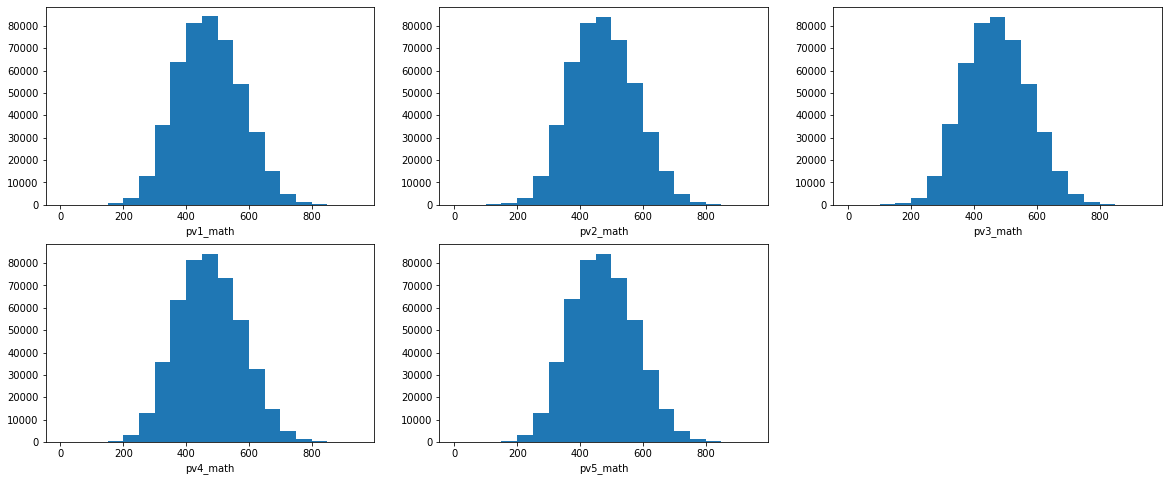

In [46]:
column_name = "pv{i}_math"
size = [20,8]
bins = np.arange(0, 1e3, 50)
plot_hists_PV(df, column_name, bins, size)

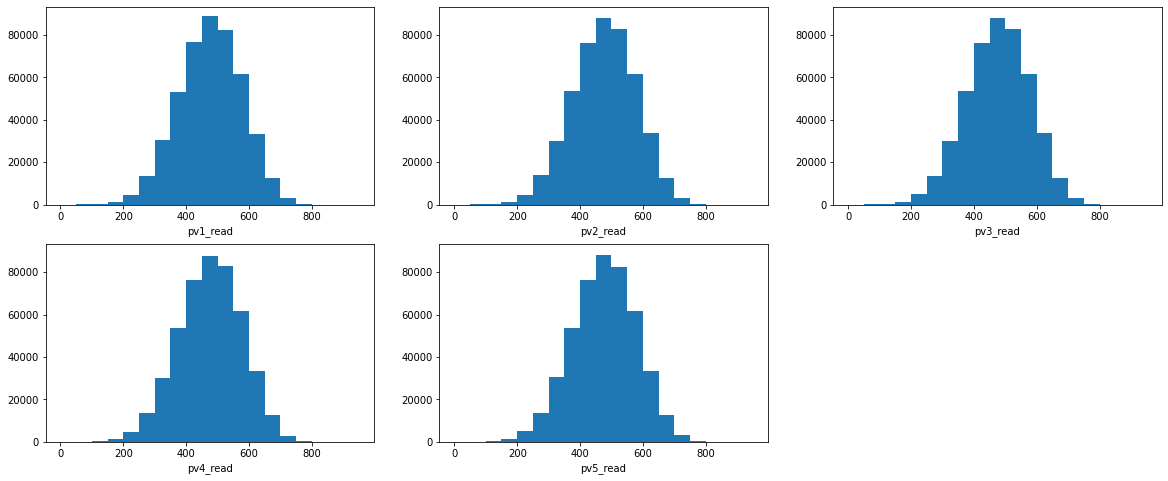

In [47]:
column_name = "pv{i}_read"
bins = np.arange(0, 1e3, 50)
plot_hists_PV(df, column_name, bins, size)

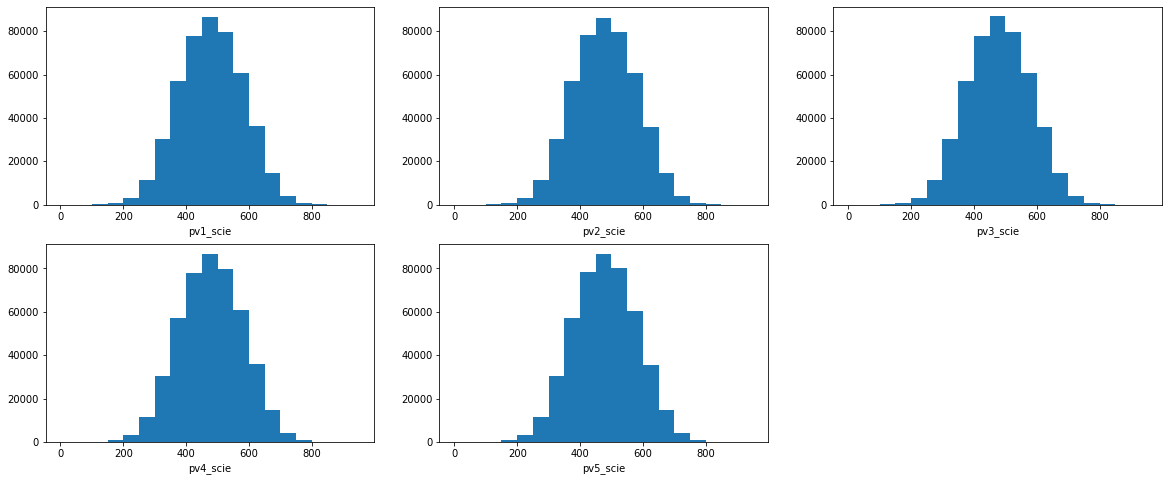

In [48]:
column_name = "pv{i}_scie"
size = [20,8]
bins = np.arange(0, 1e3, 50)
plot_hists_PV(df, column_name, bins, size)

The distribution of the plausible values is normal, with the peak between 400 and 600, approximately in 500. In each subject (math, reading, and science), the distribution for each plausible value (1 through 5) is very similar.

Next up, let's see the first 3 predictors variables of interest: father_isei, mother_isei, and highest_isei

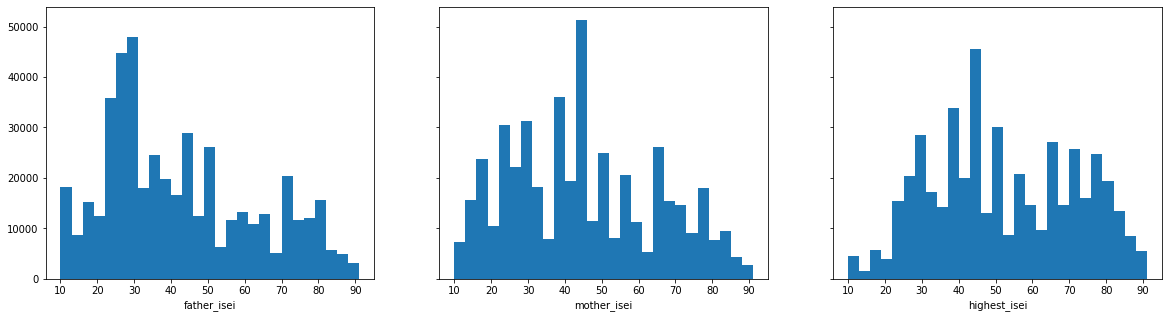

In [49]:
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharey=True)

columns = ["father_isei", "mother_isei", "highest_isei"]
bins_size = 3
bins = np.arange(10, df.father_isei.max()+bins_size, bins_size)
i = 0
for column in columns:
    axs[i].hist(data=df, x=column, bins=bins)
    axs[i].set_xlabel(column)
    i += 1

In [50]:
df[columns].mean()

father_isei     42.686811
mother_isei     44.978664
highest_isei    52.061906
dtype: float64

The PISA's International Socio-Economic Index of Occupational Status (ISEI) captures the attributes of occupations that convert parents' education into income. The mother's ISEI distribution has a peak between 40 and 50, while the father's ISEI distribution has a peak between 20 and 30. The highest parental ISEI distribution follows the mother's ISEI distribution, with the peak between 40 and 50.

Now, I'll look at the highest parental education in years variable (highest_parents_educ).

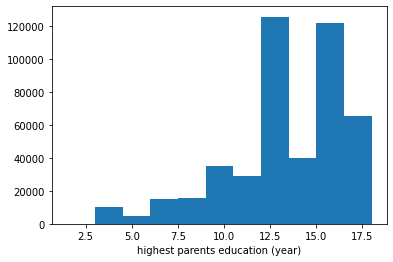

In [51]:
bins_size = 1.5
bins = np.arange(1.5, df.highest_parents_educ.max()+bins_size, bins_size)
plt.hist(data=df, x="highest_parents_educ", bins=bins)
plt.xlabel("highest parents education (year)");

The highest_parents_educ variable is more skewed to the left, but it has two peaks, the first in 12.5 years, and the second in 15 years.

I'll now look at the last three numeric variables: age, month_birth, and year_birth

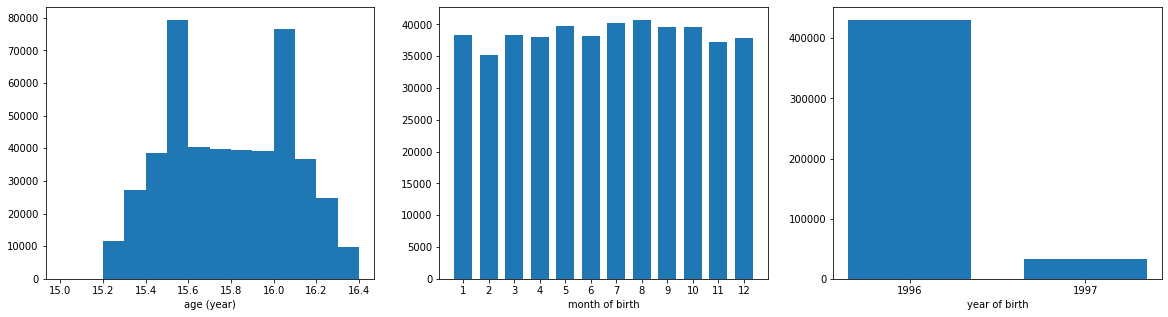

In [52]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 3, 1)
bins_size = 0.1
bins = np.arange(15, df.age.max()+bins_size, bins_size)
plt.hist(data=df, x="age", bins=bins)
plt.xlabel("age (year)");

plt.subplot(1, 3, 2)
bins_size = 1
bins = np.arange(0.5, 12.5+bins_size, bins_size)
plt.hist(data=df, x="month_birth", bins=bins, rwidth=.7)
plt.xticks(np.arange(1, 12+bins_size, bins_size))
plt.xlabel("month of birth");

plt.subplot(1, 3, 3)
bins_size = 1
bins = np.arange(df.year_birth.min()-0.5, df.year_birth.max()+0.5+bins_size, bins_size)
plt.hist(data=df, x="year_birth", bins=bins, rwidth=.7)
plt.xticks(np.arange(df.year_birth.min(), df.year_birth.max()+bins_size, bins_size))
plt.xlabel("year of birth");

The age variable has a bimodal distribution, with the first peak between 15.4 and 15.6 and the second between 16 and 16.2. The distribution of students in the month of birth variable is very like to each other, i.e., the number of students in each month doesn't change much. Finally, the year of birth variable has a disparity in the number of students that have been born in 1996, in comparison to 1997.

Now, I'll look at the categorical variables. To begin with, I'll start with the nominal variables (OECD_country and gender).

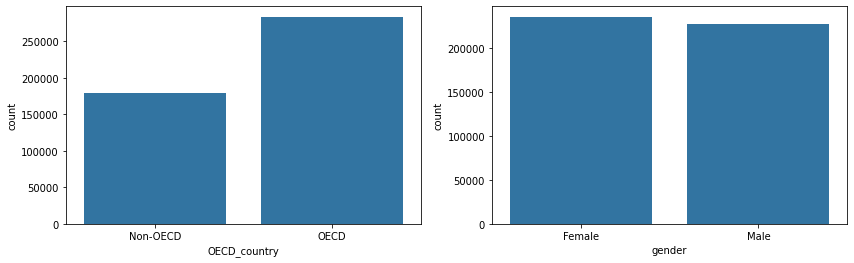

In [53]:
plt.figure(figsize=[14, 4])
base_color = sns.color_palette()[0]

plt.subplot(1, 2, 1)
sns.countplot(data=df, x="OECD_country", color=base_color)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x="gender", color=base_color);

There are many more students from OECD countries than non OECD countries. Meanwhile, the difference in the number of male and female students is small, but there are more female students in the dataset.

Next up, let's move on to looking ordinal categorical variables (phones, televisions, computers, and cars).

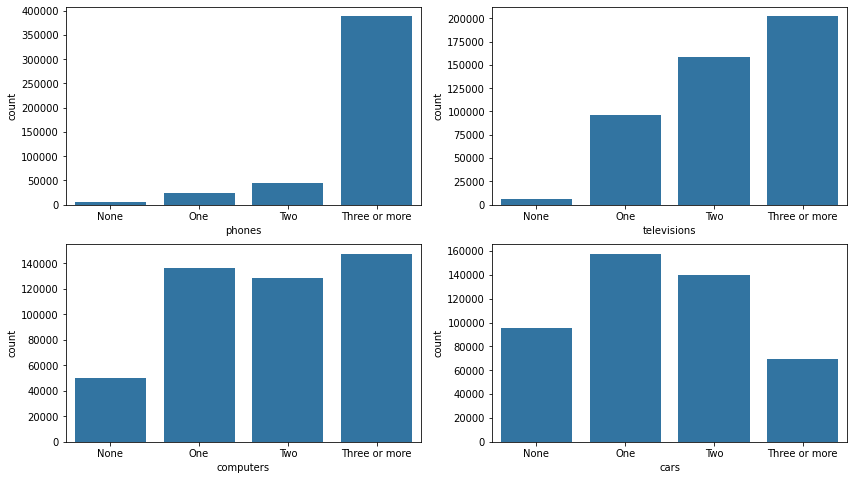

In [54]:
columns = ["phones", "televisions", "computers", "cars"]

plt.figure(figsize=[14, 8])
i = 1
for column in columns:
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=column, color=base_color)
    i += 1

The number of phones and televions at students' home is growing from none to three or more. Meanwhile, there are more students whith one computer at home than two, but most of students have three or more. The number of cars is the only ordinal variable that most of students have only one at their homes.

Finally, let's see the last ordinal variable: books

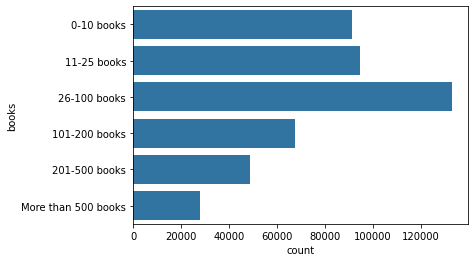

In [55]:
sns.countplot(data=df, y="books", color=base_color);

The category with the highest number of students is the middle one (26-100 books). Moreover, most of students are in the first three categories, i.e., with less than 100 books at home.

Finally, I'll look at the last variable: country.

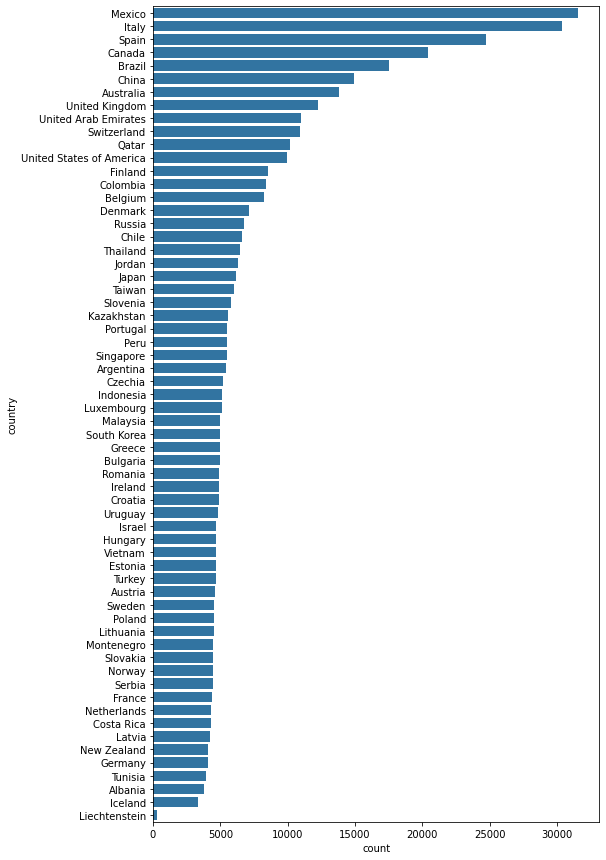

In [56]:
country_order = df.groupby("country").count().school_id.sort_values(ascending=False).index

plt.figure(figsize=[8,15])
sns.countplot(data=df, y="country", color=base_color, order=country_order);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

All the plausible values, for each subject (math, reading, and science), have a normal distribution, with the peak between 400 and 600, approximately in 500. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the month of birth variable, some outliers were identified (month 99). They were added to the assessment list, and then cleaned.  

<a name="bi"></a>
## Bivariate Exploration

To start, I'll look at pairwise correlations present between features in the data. As shown in the **Univariate Exploration**, the distributions of the 5 plausible values for each subject (math, reading and science) are very similar to each other, so, to simplify, I'll show the relationship between the  numeric variables and the first plausible value for each subject.

In order to make the plots clearer and render faster, I'll use a sample of 1,000 students.

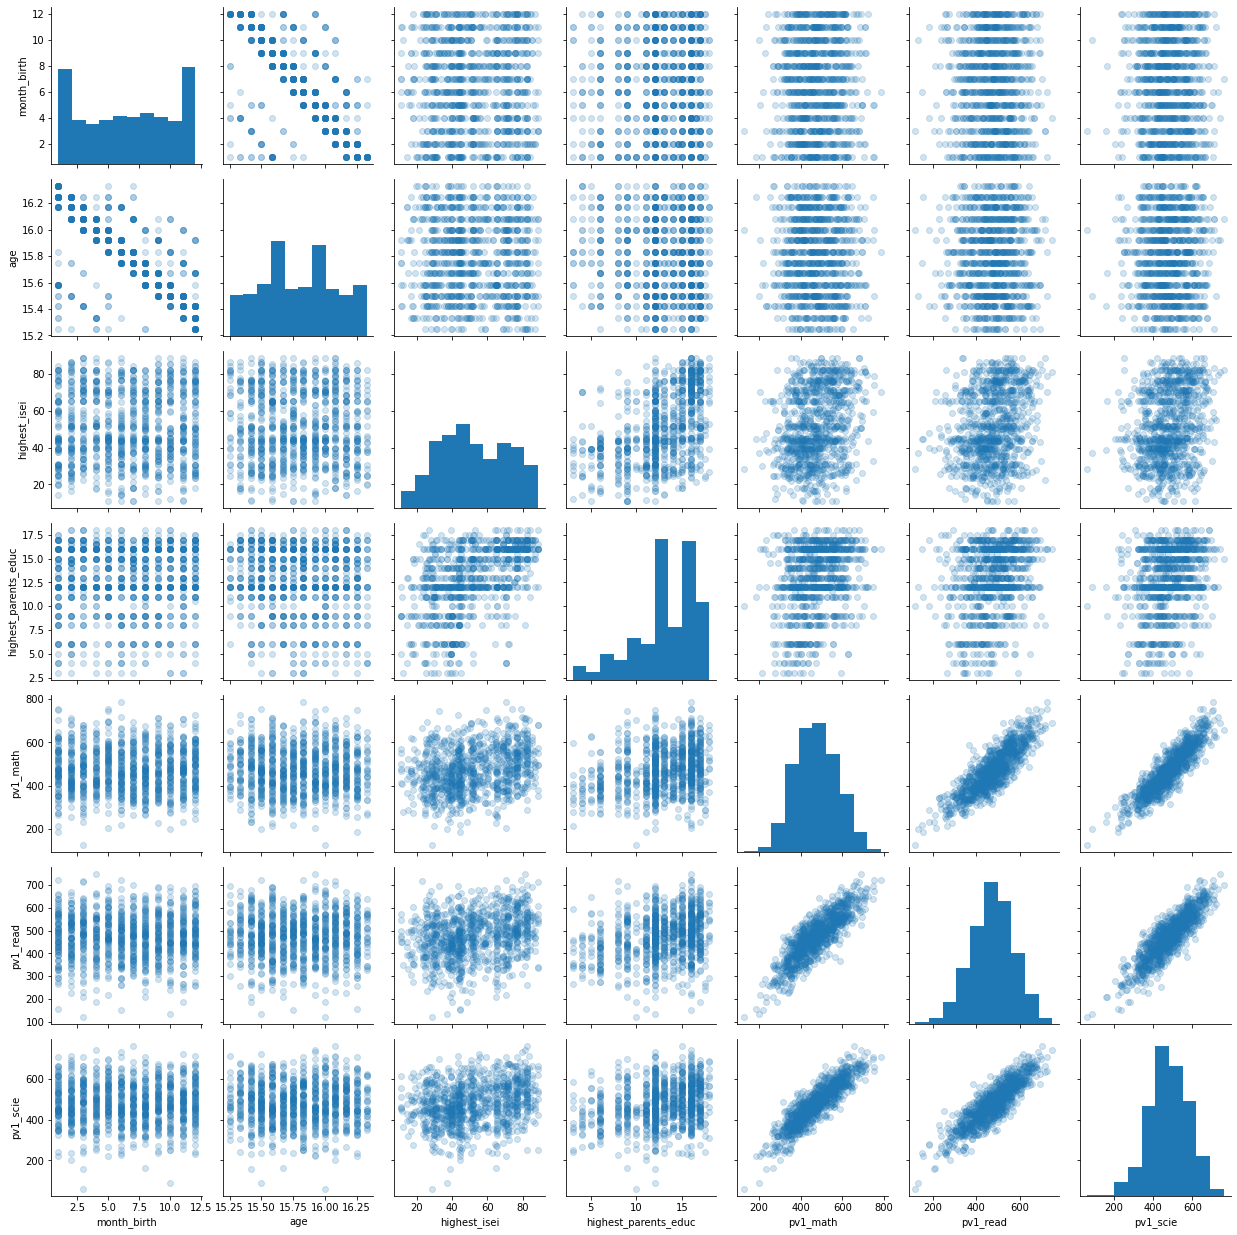

In [57]:
num_vars = ["month_birth",
            "age", 
            "highest_isei",  
            "highest_parents_educ", 
            "pv1_math", 
            "pv1_read", 
            "pv1_scie"]

g = sns.PairGrid(data=df.sample(1000), vars=num_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=1/5);

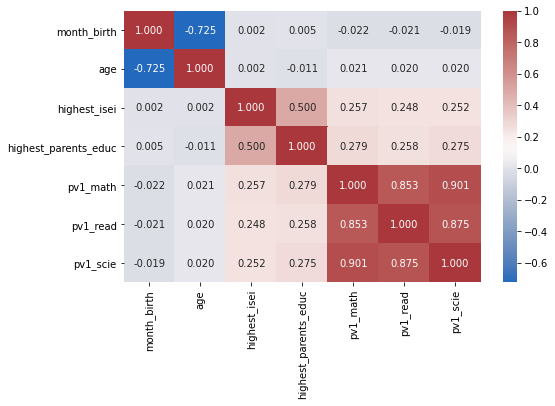

In [58]:
plt.figure(figsize=[8,5])
sns.heatmap(df[num_vars].corr(), annot=True, fmt=".3f", cmap="vlag");

As expected, the plausible values have a strong positive relationships with each other, and the highest parental ISEI and the highest parental education in years have a weak to moderate positive relationship with the plausible values.

The month of birth has a weak negative correlation with each plausible value. Meanwhile, the age variable has a weak positive releationship.

Now, let's look at how the categorical variables are related with the plausible values. Again, I'll only consider the first plausible value in each subject.

In [59]:
def plot_box(df, cat_vars, subjects):
    """Create a box plot for each subject in subjects in each categorical variable in cat_vars."""
    
    i = 1
    for var in cat_vars:
        for subject in subjects:
            plt.subplot(len(cat_ord_vars), len(subjects), i)
            sns.boxplot(data=df, x=var, y=f"pv1_{subject}", color=base_color);
            plt.xticks(rotation=cat_vars[var])
            i += 1

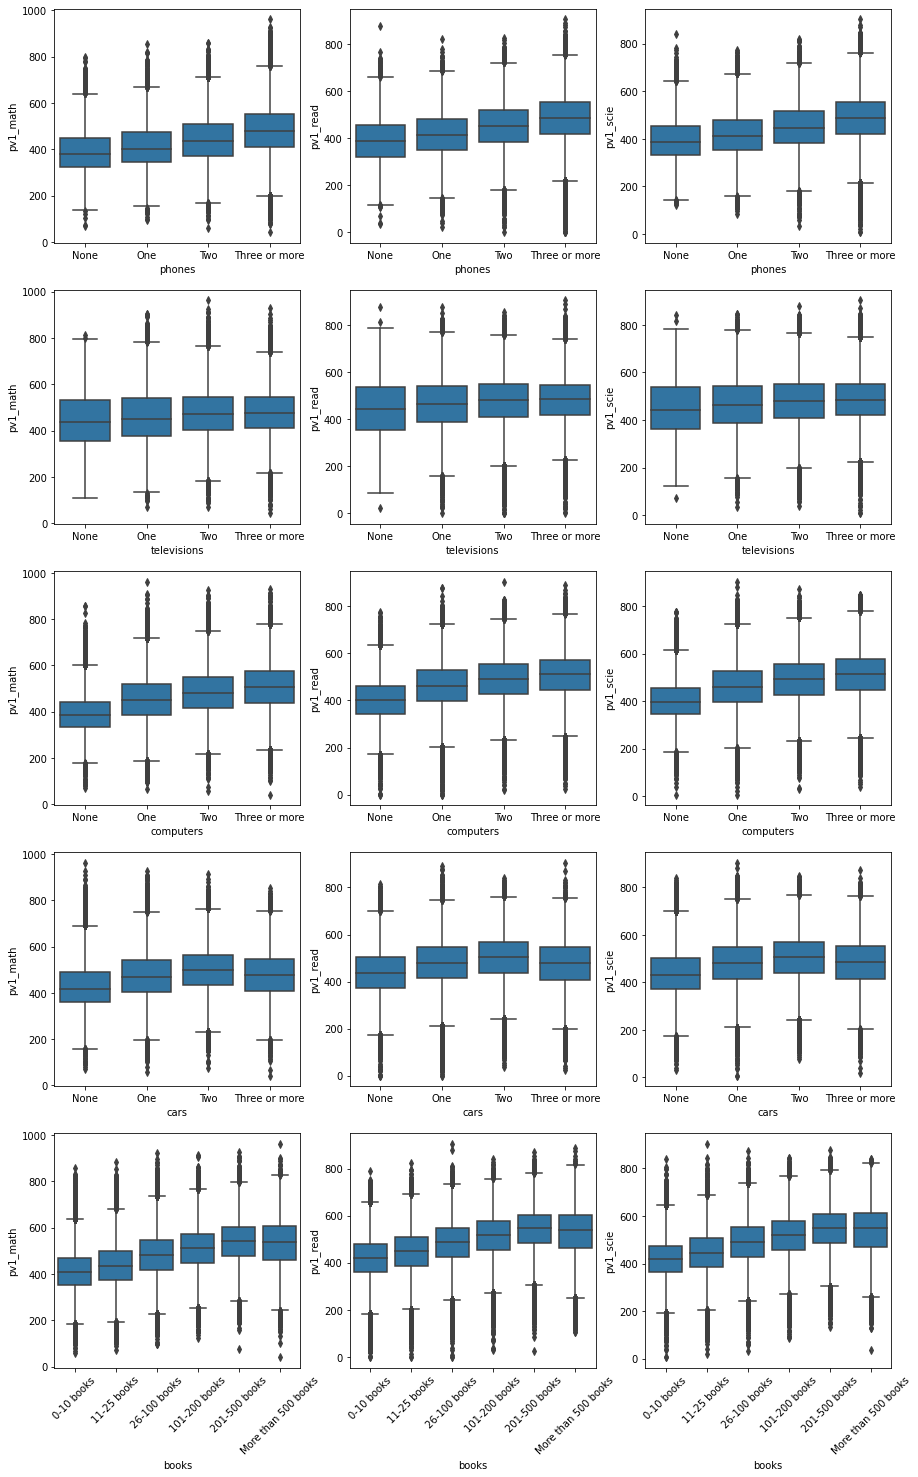

In [60]:
subjects = {"math": "Math", "read": "Reading", "scie": "Science"}
cat_ord_vars = {"phones": 0, "televisions": 0, "computers": 0, "cars": 0, "books": 45}

plt.figure(figsize=[5*len(subjects), 5*len(cat_ord_vars)])
plot_box(df, cat_ord_vars, subjects);

In each categorical variable, the median of the plausible value has a growing value in the categories. The only exception is with the variable number of cars, where the median is greater with students that have two cars at home.

Now, let's see the distribution of these categorical variables with a violin plot.

In [61]:
def plot_violin(df, cat_vars, subjects):
    """Create a violin plot for each subject in subjects in each categorical variable in cat_vars."""
    
    i = 1
    for var in cat_vars:
        for subject in subjects:
            plt.subplot(len(cat_ord_vars), len(subjects), i)
            sns.violinplot(data=df, x=var, y=f"pv1_{subject}", color=base_color);
            plt.xticks(rotation=cat_vars[var])
            i += 1

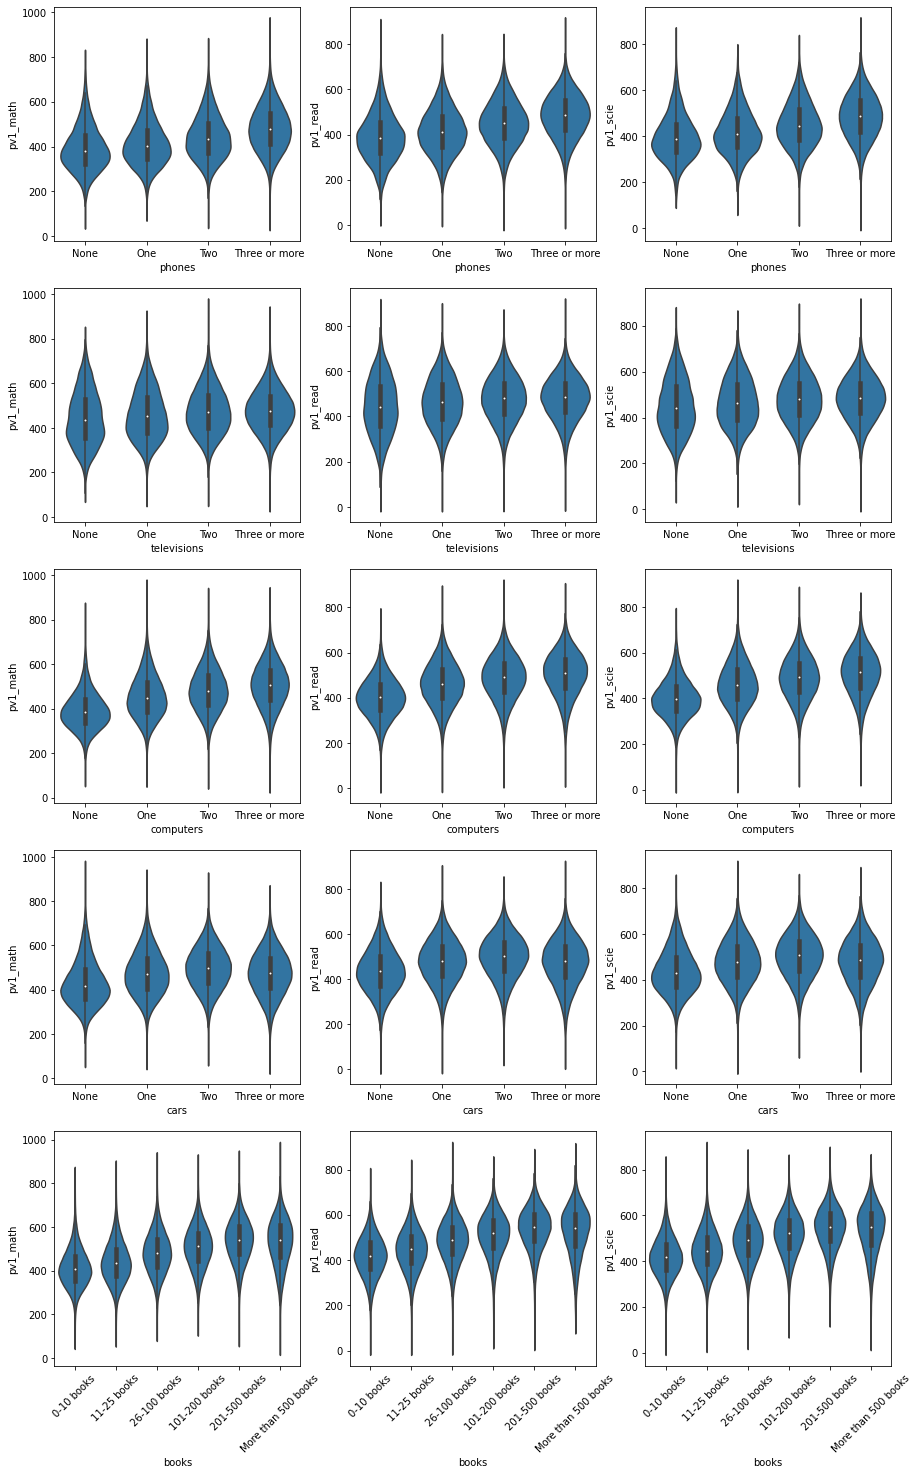

In [62]:
plt.figure(figsize=[5*len(subjects), 5*len(cat_ord_vars)])
plot_violin(df, cat_ord_vars, subjects);

And, again, it's clear the trend of the plausible value to increase with the increase of the ordinal category, except for the cars variable, as seen early.

Next up, I'll see how the two nominal variables are related with the plausible values.

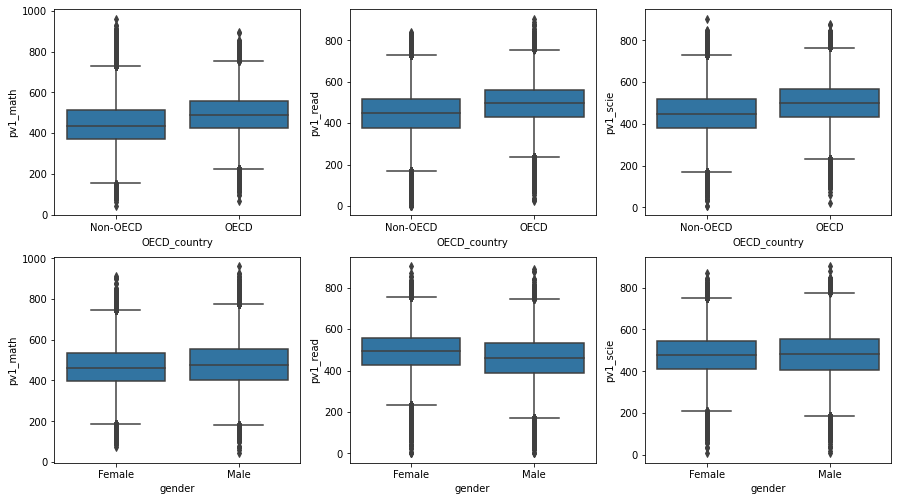

In [63]:
cat_nom_vars = {"OECD_country": 0, "gender": 0}

plt.figure(figsize=[5*len(subjects), 11*len(cat_nom_vars)])
plot_box(df, cat_nom_vars, subjects);

The OECD countries have a higher plausible value median in all the subjects than the non OECD. Meanwhile, the gender variable doesn't generate a significant impact at the plausible values.

And, again, let's see these two nominal variables in a violin plot.

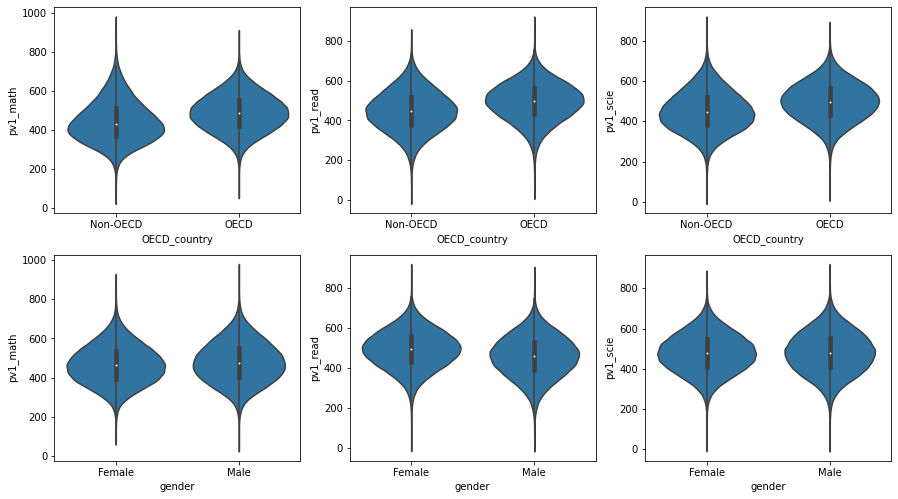

In [64]:
plt.figure(figsize=[5*len(subjects), 11*len(cat_nom_vars)])
plot_violin(df, cat_nom_vars, subjects);

The plots only confirms the fact that OECD countries have higher values in every subjects than non OECD countries. 

After the preliminary look at the bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how the first plausible value of each subject (math, science, and reading) is related with the highest parental ISEI. In order to make the plots clearer and render faster, I'll use a sample of 10,000 students.

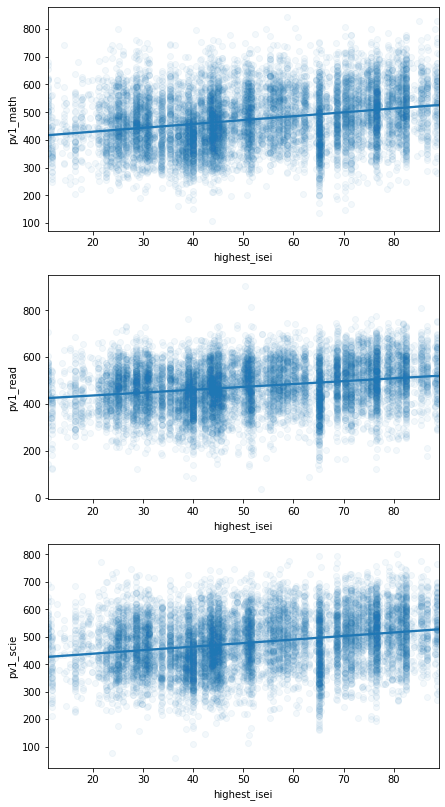

In [65]:
plt.figure(figsize=[7,14])
i = 1
for subject in subjects:
    plt.subplot(3, 1, i)
    sns.regplot(data=df.sample(10000), x="highest_isei", y=f"pv1_{subject}", scatter_kws={"alpha": 1/20})
    i += 1

These plots suggest that the plausible value increase with the increase of the parental ISEI. This was already seen in the correlation heatmap shown early.

Another variable that I want to see in detail is the highest parental education in years, and in order to make the plots clearer and render faster, I'll, again, use a sample of 10,000 students.

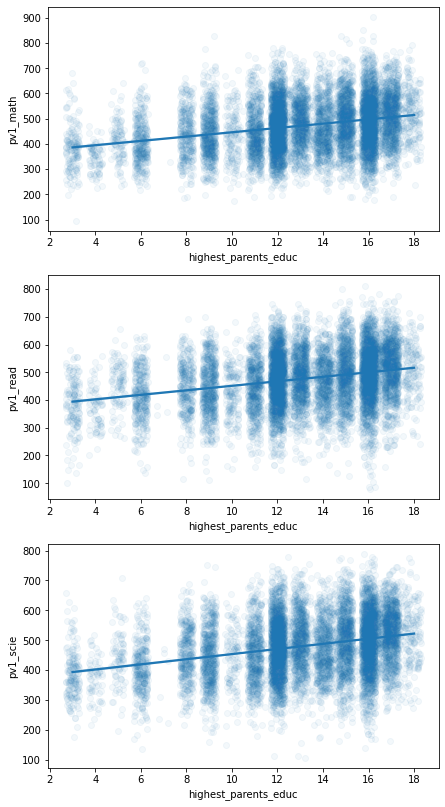

In [66]:
plt.figure(figsize=[7,14])
i = 1
for subject in subjects:
    plt.subplot(3, 1, i)
    sns.regplot(data=df.sample(10000), x="highest_parents_educ", y=f"pv1_{subject}", x_jitter=0.3, scatter_kws={"alpha": 1/20})
    i += 1

And, again, it's clear the increase in the plausible values with the increase in the years of the highest parental education.

In the correlation heatmap, it's clear the strong positive correlation between the highest parental education in years and the highest parental ISEI, with a 0.5 correlation coefficient. Now, let's look at the relationships between the highest parental ISEI and the categorical variables. 

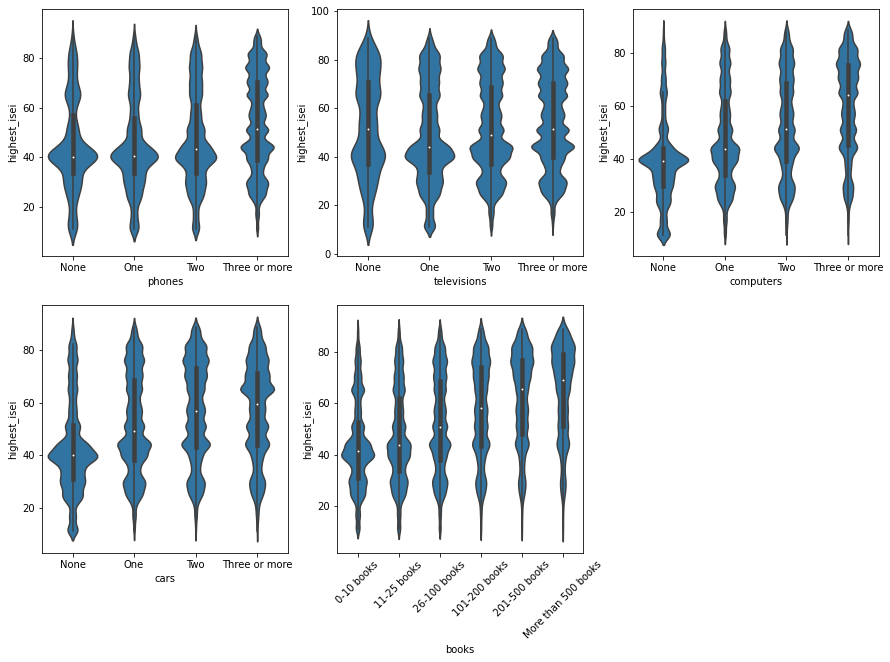

In [67]:
plt.figure(figsize=[15, 10])
i = 1
for var in cat_ord_vars:
    plt.subplot(2, 3, i)
    sns.violinplot(data=df, x=var, y="highest_isei", color=base_color)
    plt.xticks(rotation=cat_ord_vars[var])
    i += 1

For the ordinal variables, with a increase in the order, the median of the parental ISEI increases too.

Let's see how the nominal variables are related with the parental ISEI. 

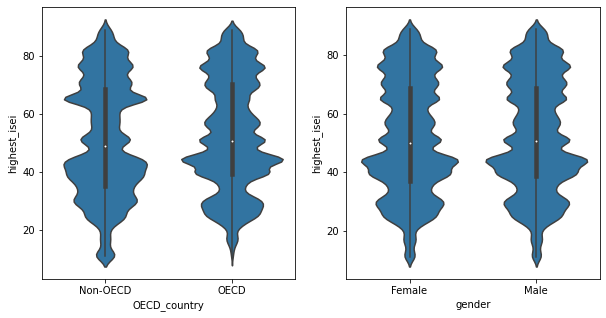

In [68]:
plt.figure(figsize=[10, 5])
i = 1
for var in cat_nom_vars:
    plt.subplot(1, 2, i)
    sns.violinplot(data=df, x=var, y="highest_isei", color=base_color)
    plt.xticks(rotation=cat_nom_vars[var])
    i += 1

The median for OECD countries is higher than for non OECD. Meanwhile, there isn't a significant difference between female and male students.

Now, I'll explore the relationships between the highest parental education in years and the ordinal variables.

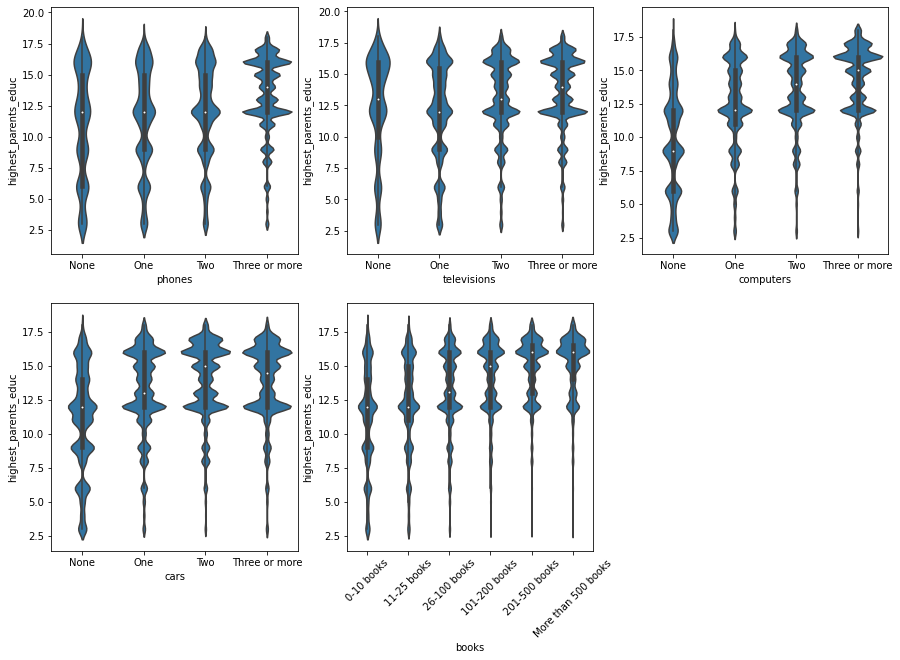

In [69]:
plt.figure(figsize=[15, 10])
i = 1
for var in cat_ord_vars:
    plt.subplot(2, 3, i)
    sns.violinplot(data=df, x=var, y="highest_parents_educ", color=base_color)
    plt.xticks(rotation=cat_ord_vars[var])
    i += 1

For all the variables above, the number of books and computers call attention for the big increase in the median in the last category.

Let's see how the nominal variables are related with the highest parental education in years.

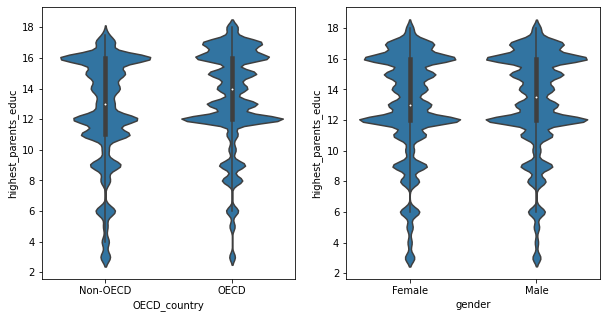

In [70]:
plt.figure(figsize=[10, 5])
i = 1
for var in cat_nom_vars:
    plt.subplot(1, 2, i)
    sns.violinplot(data=df, x=var, y="highest_parents_educ", color=base_color)
    plt.xticks(rotation=cat_nom_vars[var])
    i += 1

And, again, the median for OECD countries is higher than for non OECD. Meanwhile, there isn't a significant difference between female and male students.

Now, let's look at how the variable country influences the plausible values.

In [71]:
# Create a dataframe grouped by country with the average of each plausible value by country
df_country = df.groupby("country", as_index=False).mean()
df_country.drop(["month_birth", "year_birth"], axis=1, inplace=True)
df_country.head()

country        age  father_isei  mother_isei  highest_isei  \
0    Albania  15.811097    39.721214    39.962891     46.376962   
1  Argentina  15.683724    39.667787    44.835588     50.752313   
2  Australia  15.783735    45.952759    51.199585     58.883927   
3    Austria  15.804859    44.331747    42.885182     51.624264   
4    Belgium  15.841636    45.990467    46.111071     54.392425   

   highest_parents_educ    pv1_math    pv2_math    pv3_math    pv4_math  ...  \
0             12.812696  394.704674  394.572815  395.435793  394.550840  ...   
1             12.860634  400.223135  400.859926  400.074670  400.259749  ...   
2             13.135918  496.569557  497.007586  497.021284  497.306727  ...   
3             13.838484  508.781561  508.655218  508.987884  508.872920  ...   
4             14.479616  521.812729  521.651235  521.301880  521.735325  ...   

     pv1_read    pv2_read    pv3_read    pv4_read    pv5_read    pv1_scie  \
0  396.586236  397.775058  396.185367  398.080540  395.666090  398.159539   
1  409.779040  409.751533  409.924750  409.716949  410.669038  416.007422   
2  505.396535  505.495136  505.796236  505.664923  505.422007  515.272467   
3  492.621653  493.737651  493.004121  493.253524  493.577131  508.972492   
4  514.711620  514.327237  514.704234  514.999249  514.517611  512.550346   

     pv2_scie    pv3_scie    pv4_scie    pv5_scie  
0  398.673285  397.657486  399.003603  397.244347  
1  415.720147  416.284915  416.131421  416.460808  
2  515.388530  516.005892  515.735978  515.644679  
3  509.858835  509.848060  510.279846  510.227195  
4  512.069673  512.210359  512.538285  512.125586  

[5 rows x 21 columns]

In [72]:
# For each subject, calculate the average of the plausible value for each country
df_subject = df_country.loc[:, "country":"highest_parents_educ"].copy()
for subject in subjects:
    df_subject[subject] = [np.mean(row) for row in zip(df_country.loc[:, f"pv1_{subject}":f"pv5_{subject}"].to_numpy())]

df_subject.head()

country        age  father_isei  mother_isei  highest_isei  \
0    Albania  15.811097    39.721214    39.962891     46.376962   
1  Argentina  15.683724    39.667787    44.835588     50.752313   
2  Australia  15.783735    45.952759    51.199585     58.883927   
3    Austria  15.804859    44.331747    42.885182     51.624264   
4    Belgium  15.841636    45.990467    46.111071     54.392425   

   highest_parents_educ        math        read        scie  
0             12.812696  394.558246  396.858658  398.147652  
1             12.860634  400.406806  409.968262  416.120943  
2             13.135918  496.962628  505.554967  515.609509  
3             13.838484  508.883347  493.238816  509.837286  
4             14.479616  521.554301  514.651990  512.298850

In [73]:
# Merge the previous dataframe into the world dataframe
df_country = world.merge(df_subject, left_on="name", right_on="country", how="left")
df_country.drop("name", axis=1, inplace=True)
df_country.head()

pop_est      continent iso_a3  gdp_md_est  \
0     920938        Oceania    FJI      8374.0   
1   53950935         Africa    TZA    150600.0   
2     603253         Africa    ESH       906.5   
3   35623680  North America    CAN   1674000.0   
4  326625791  North America    USA  18560000.0   

                                            geometry  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   

                    country        age  father_isei  mother_isei  \
0                       NaN        NaN          NaN          NaN   
1                       NaN        NaN          NaN          NaN   
2                       NaN        NaN          NaN          NaN   
3                    Canada  15.838973    44.830563    50.725556   
4  United States of America  15.823986    46.029568    51.074212   

   highest_isei  highest_parents_educ        math        read        scie  
0           NaN                   NaN         NaN         NaN         NaN  
1           NaN                   NaN         NaN         NaN         NaN  
2           NaN                   NaN         NaN         NaN         NaN  
3     57.516971             15.015520  512.224910  514.280295  517.442004  
4     58.199298             13.892494  487.887315  505.847161  504.009898

In [74]:
def plot_world(df, column, title, title_legend, show_missing_values=True):
    """Plot a world map colored by he values in the column."""
    
    fig, ax = plt.subplots(1, 1, figsize=(20,20))
    
    plt.title(title, fontdict={"fontsize": "xx-large"})
    if show_missing_values:
        plt.legend([plt.scatter([],[],color="lightgrey")],["Missing values"])
        dict_missing = {"color": "lightgrey"}
    else:
        dict_missing = None
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="6%", pad=0.4)

    df.plot(column=column,
                   ax=ax,
                   legend=True,
                   legend_kwds={"label": title_legend,
                                "orientation": "horizontal"},
                   cmap="viridis_r", 
                   cax=cax,
                   missing_kwds=dict_missing)

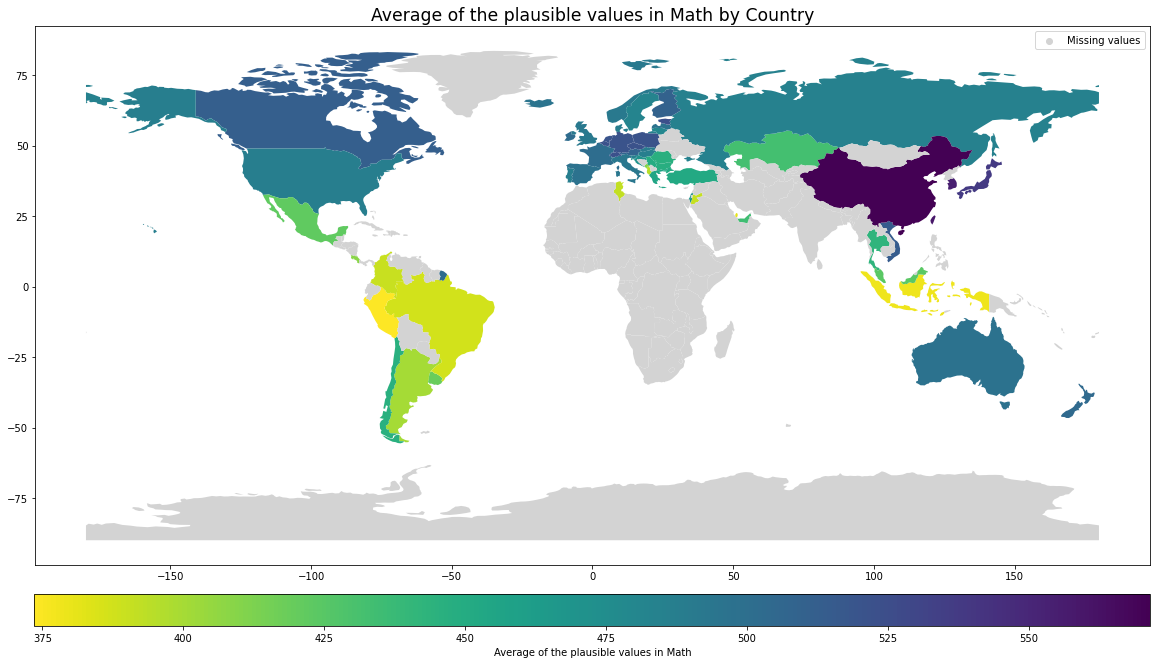

In [75]:
plot_world(df_country, 
           "math", 
           "Average of the plausible values in Math by Country", 
           "Average of the plausible values in Math")

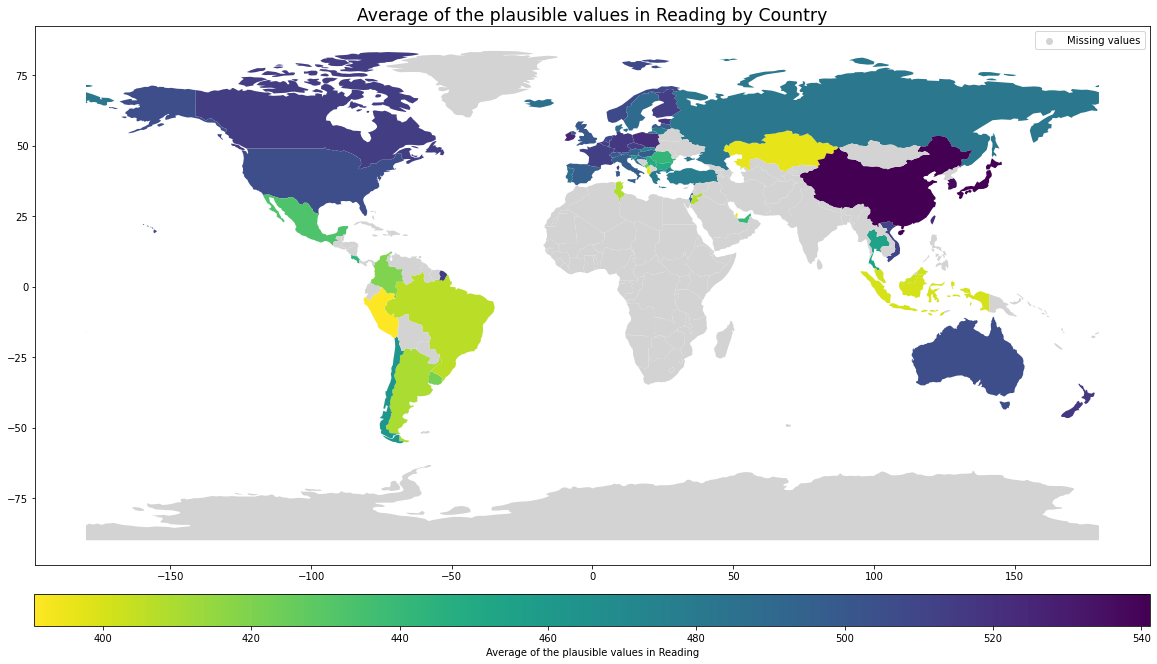

In [76]:
plot_world(df_country, 
           "read", 
           "Average of the plausible values in Reading by Country", 
           "Average of the plausible values in Reading")

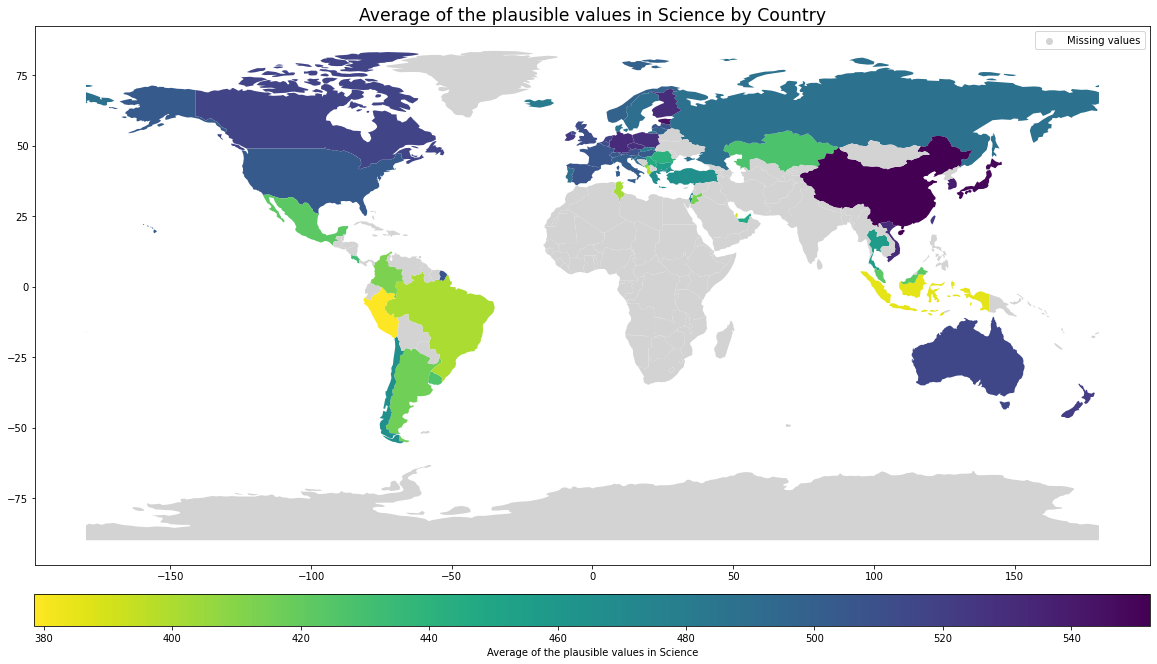

In [77]:
plot_world(df_country, 
           "scie", 
           "Average of the plausible values in Science by Country", 
           "Average of the plausible values in Science")

As shown above, the countries remain with high averages for all three subjects. Moreover, it's possible to see a preponderance of dark colors, which indicates high values, in Europe, Oceania (Australia and New Zealand), North America (EUA and Canada), China, Japan and South Korea. 

To explore how the continents influence the academic lives of students who have taken the PISA 2012, let's see the same type of the above visualization, but by continent.

In [78]:
# Merge the world dataframe into the original dataframe. Then, group the resulting dataframe by continent
df_continent = world.merge(df, left_on="name", right_on="country", how="left")
df_continent = df_continent.groupby("continent", as_index=False).mean()

In [79]:
# Create the continents dataframe from the world dataframe
continents = world[["continent", "geometry"]]
continents = continents.dissolve(by="continent", as_index=False)

In [80]:
# Merge the df_continent into the continents dataframe. Then, drop some unnecessary columns
df_continent = continents.merge(df_continent, on="continent", how="left")
df_continent.drop(["month_birth", "year_birth", "pop_est", "gdp_md_est"], axis=1, inplace=True)
df_continent.head()

continent                                           geometry  \
0         Africa  MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...   
1     Antarctica  MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...   
2           Asia  MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...   
3         Europe  MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...   
4  North America  MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...   

         age  father_isei  mother_isei  highest_isei  highest_parents_educ  \
0  15.868835    38.355467    42.273904     47.948342             11.880000   
1        NaN          NaN          NaN           NaN                   NaN   
2  15.781670    45.404183    48.181347     54.191077             12.620150   
3  15.777741    42.784974    44.331568     51.921963             13.664914   
4  15.778047    40.853903    45.104604     51.979396             12.878053   

     pv1_math    pv2_math    pv3_math  ...    pv1_read    pv2_read  \
0  391.785182  392.538948  392.424783  ...  409.116427  409.536192   
1         NaN         NaN         NaN  ...         NaN         NaN   
2  471.675740  471.543078  471.590433  ...  468.040288  467.886132   
3  491.274132  491.288682  491.338462  ...  491.288194  491.422371   
4  458.755818  458.853580  458.841784  ...  469.545771  469.664235   

     pv3_read    pv4_read    pv5_read    pv1_scie    pv2_scie    pv3_scie  \
0  408.942048  408.855457  408.268713  401.878903  402.922911  402.339452   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2  468.114290  468.027292  468.160386  472.975432  472.837847  472.884312   
3  491.324052  491.181068  491.314362  497.519766  497.615755  497.689408   
4  469.454243  469.419111  469.474778  464.656939  464.642832  464.671215   

     pv4_scie    pv5_scie  
0  402.344435  401.404117  
1         NaN         NaN  
2  472.906329  472.958397  
3  497.494303  497.637232  
4  464.564237  464.606165  

[5 rows x 22 columns]

In [81]:
# For each subject, calculate the average of the plausible value for each continent
df_subject = df_continent.loc[:, "continent":"highest_parents_educ"].copy()
for subject in subjects:
    df_subject[subject] = [np.mean(row) for row in zip(df_continent.loc[:, f"pv1_{subject}":f"pv5_{subject}"].to_numpy())]

df_continent = df_subject.copy()
df_continent.head()

continent                                           geometry  \
0         Africa  MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...   
1     Antarctica  MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...   
2           Asia  MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...   
3         Europe  MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...   
4  North America  MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...   

         age  father_isei  mother_isei  highest_isei  highest_parents_educ  \
0  15.868835    38.355467    42.273904     47.948342             11.880000   
1        NaN          NaN          NaN           NaN                   NaN   
2  15.781670    45.404183    48.181347     54.191077             12.620150   
3  15.777741    42.784974    44.331568     51.921963             13.664914   
4  15.778047    40.853903    45.104604     51.979396             12.878053   

         math        read        scie  
0  392.019815  408.943768  402.177964  
1         NaN         NaN         NaN  
2  471.636349  468.045678  472.912463  
3  491.299884  491.306009  497.591293  
4  458.828726  469.511628  464.628278

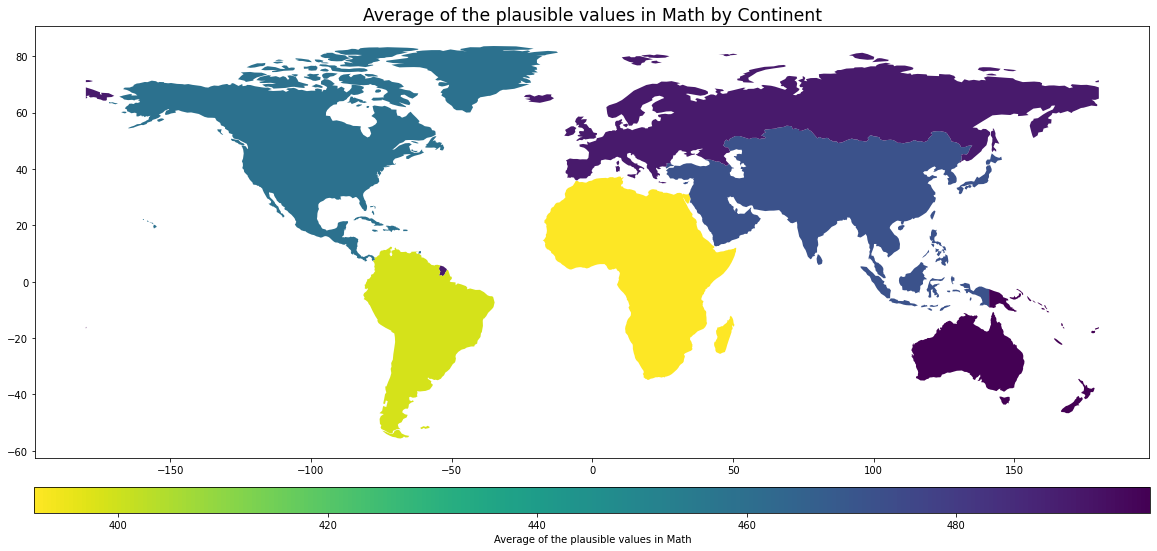

In [82]:
plot_world(df_continent, 
           "math", 
           "Average of the plausible values in Math by Continent", 
           "Average of the plausible values in Math", 
           False)

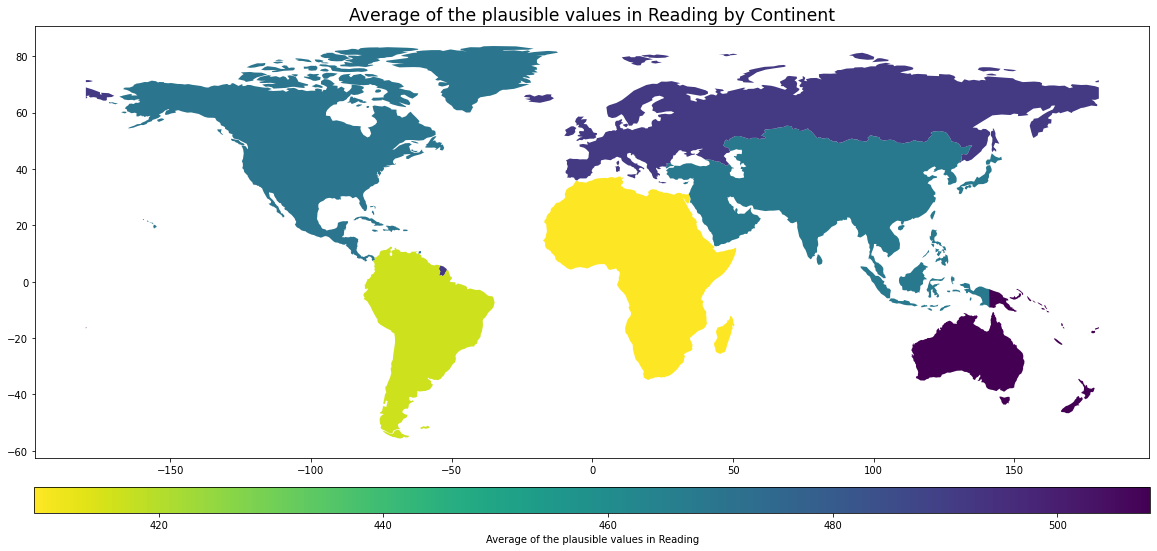

In [83]:
plot_world(df_continent, 
           "read", 
           "Average of the plausible values in Reading by Continent", 
           "Average of the plausible values in Reading", 
           False)

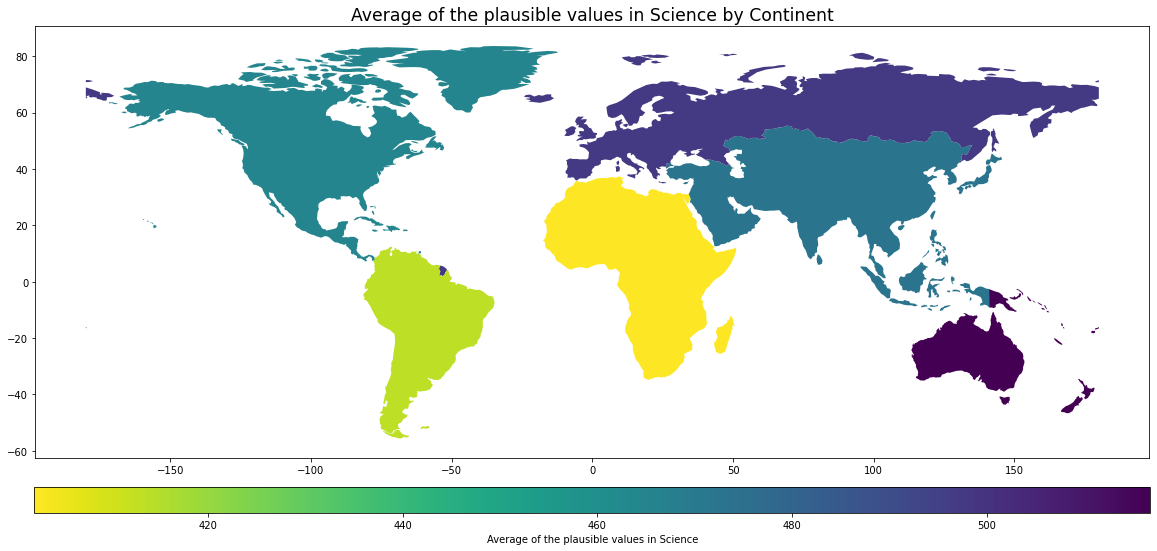

In [84]:
plot_world(df_continent, 
           "scie", 
           "Average of the plausible values in Science by Continent", 
           "Average of the plausible values in Science", 
           False)

Like it was shown in the world maps by country, the average of plausible values by subject by continent shows Europe and Oceania standing out.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

As expected, the plausible values have a strong positive relationships with each other. Moreover, the highest parental ISEI and the highest parental education in years have a weak to moderate positive relationship with the plausible values. On the other hand, the month of birth has a weak negative correlation with each plausible value. Meanwhile, the age variable has a weak positive relationship.

There are also some interesting relationships between the plausible values and the ordinal variables (cars, phones, televisions, computers, and books), where the median of the plausible value has a growing value in the ordinal categories. The only exception is with the variable cars, where the median is greater with students that have two cars at home, rather than with three or more.

Another relationship that prove to be interesting is between the plausible values and the countries. The same countries remain with high averages for all the three subjects (math, reading, and science). Moreover, in the world maps plotted, a preponderance of dark colors, which indicates high values, were seen  in Europe, Oceania (Australia and New Zealand), North America (EUA and Canada), China, Japan and South Korea.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In the correlation heatmap, it's clear the strong positive correlation between the highest parental education in years and the highest parental ISEI, with a 0.5 correlation coefficient. But looking at the relationship between the highest parental ISEI and the ordinal variables, the median of the parental ISEI increases with a increase in the order. This trend was also seen between the highest parental education in years and the ordinal variables, with a special attention to the books and computers variables, where it is possible to se a the big increase in the median in the last category.

<a name="multi"></a>
## Multivariate Exploration

The main thing I want to explore in this part is how the categorical variables books and computers play into the relationship between the parents' situation (highest parental ISEI and highest parental education in years) and the plausible values that their children took in the PISA 2012. In order to make the plots clearer and render faster, I'll use a sample of 1,000 students.

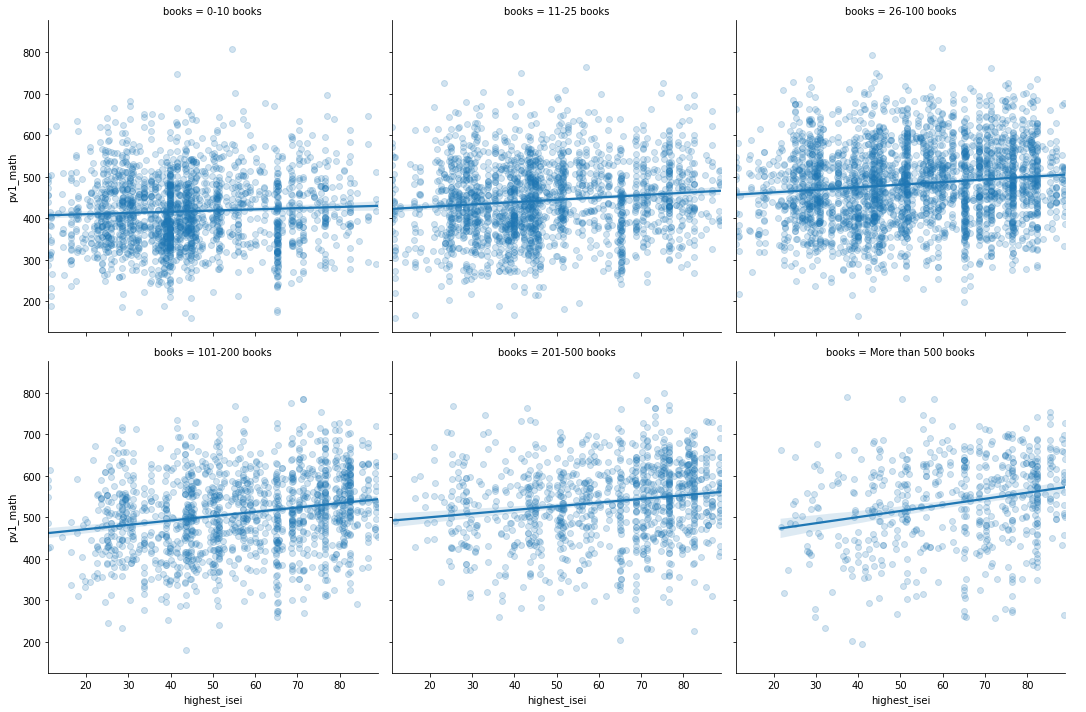

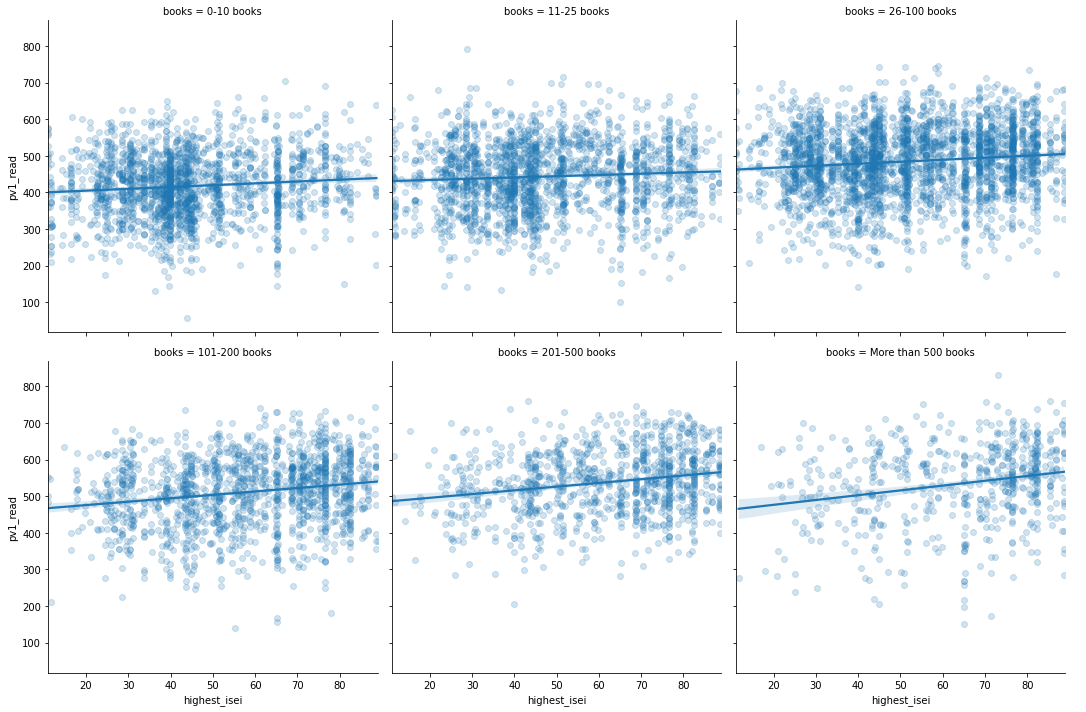

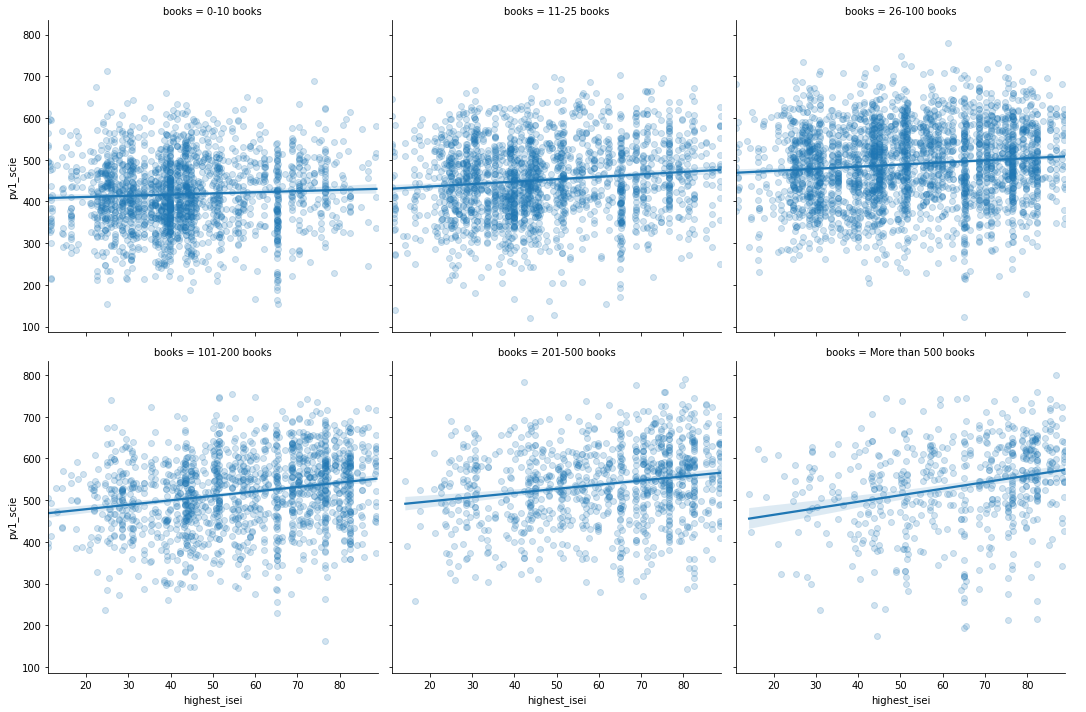

In [85]:
for subject in subjects:
    g = sns.FacetGrid(data=df.sample(10000), col="books", height=5, col_wrap=3)
    g.map(sns.regplot, "highest_isei", f"pv1_{subject}", scatter_kws={"alpha":1/5})
    g.add_legend();

In each of the faceted scatter plots of the three subjects (math, reading, and science), you can see the relationship of the number of books at home against the highest parental ISEI and plausible values 1. As the number of books at home level increases, the slope of the regression line increases too.

Now, let's see the same visualization, but with the number of computers at home instead of the number of books.

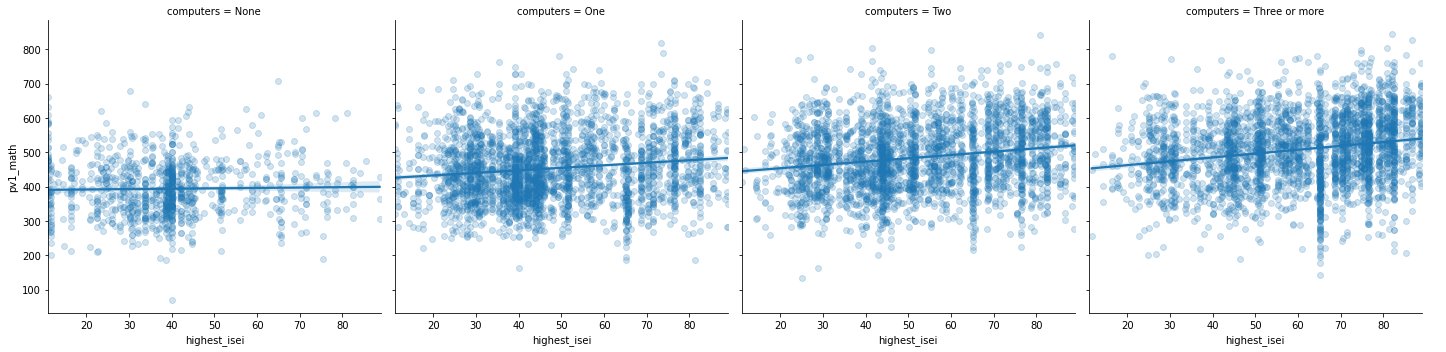

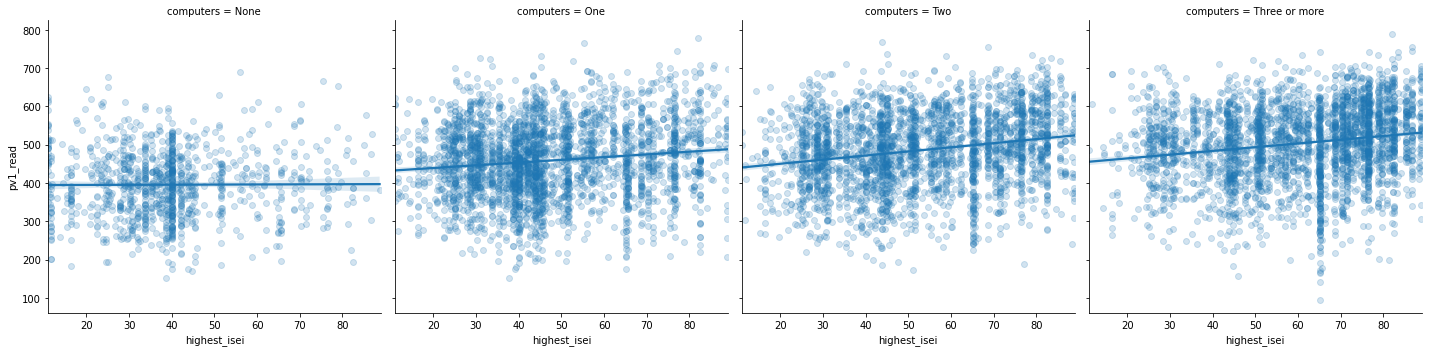

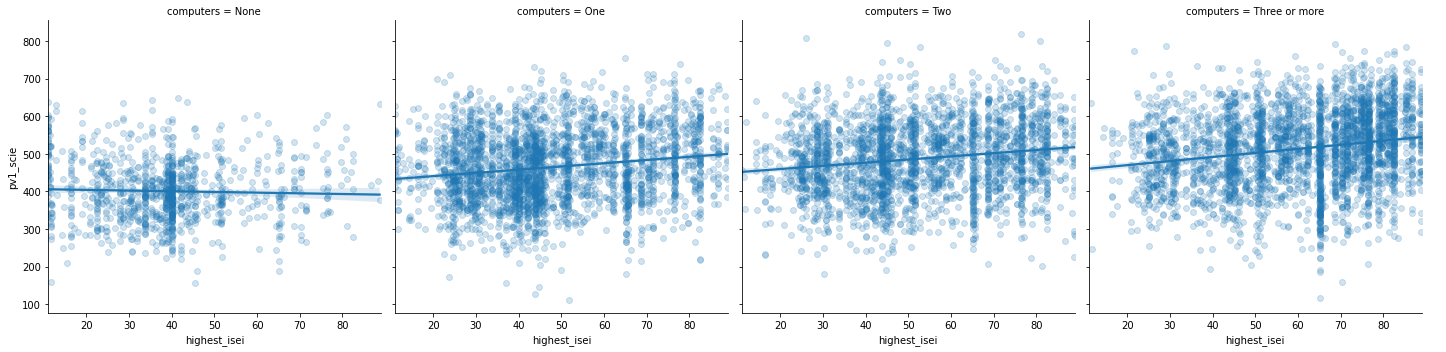

In [86]:
for subject in subjects:
    g = sns.FacetGrid(data=df.sample(10000), col="computers", height=5, col_wrap=4)
    g.map(sns.regplot, "highest_isei", f"pv1_{subject}", scatter_kws={"alpha":1/5})
    g.add_legend();

Reproducing the same plots with the number of computers at home, instead of the number of books, shows, again, a trend of increasing at the slope of the regression line, as the number of computers at home level increases.

Now, let's see the same visualizations, but with the highest parental education in years instead of the highest parental ISEI.

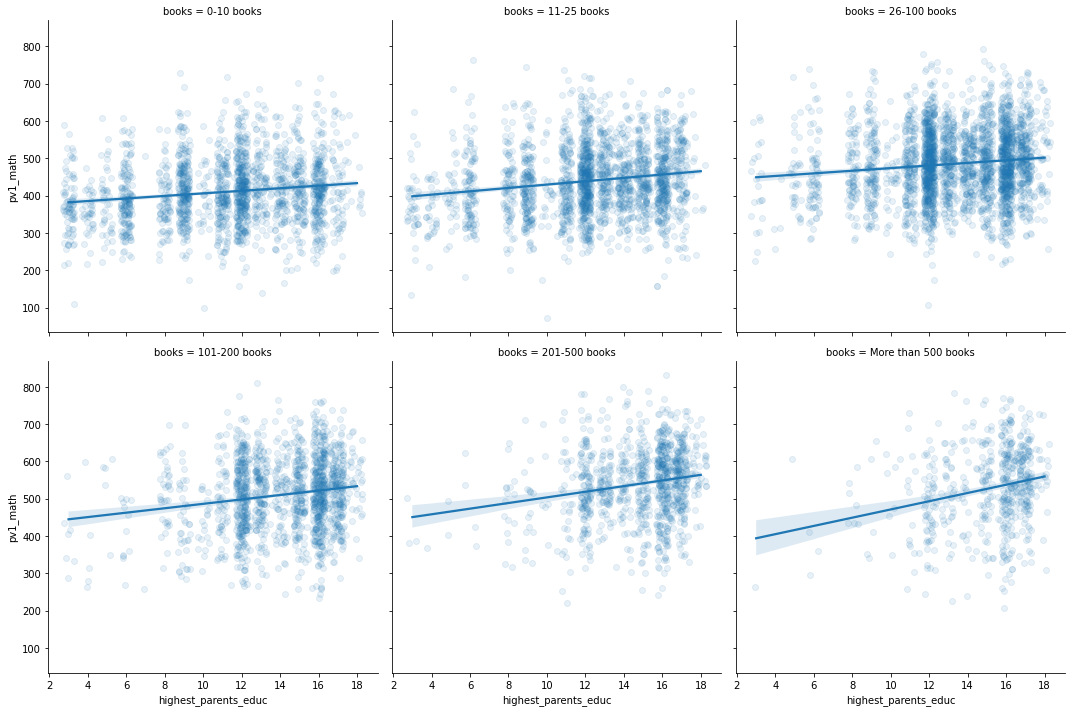

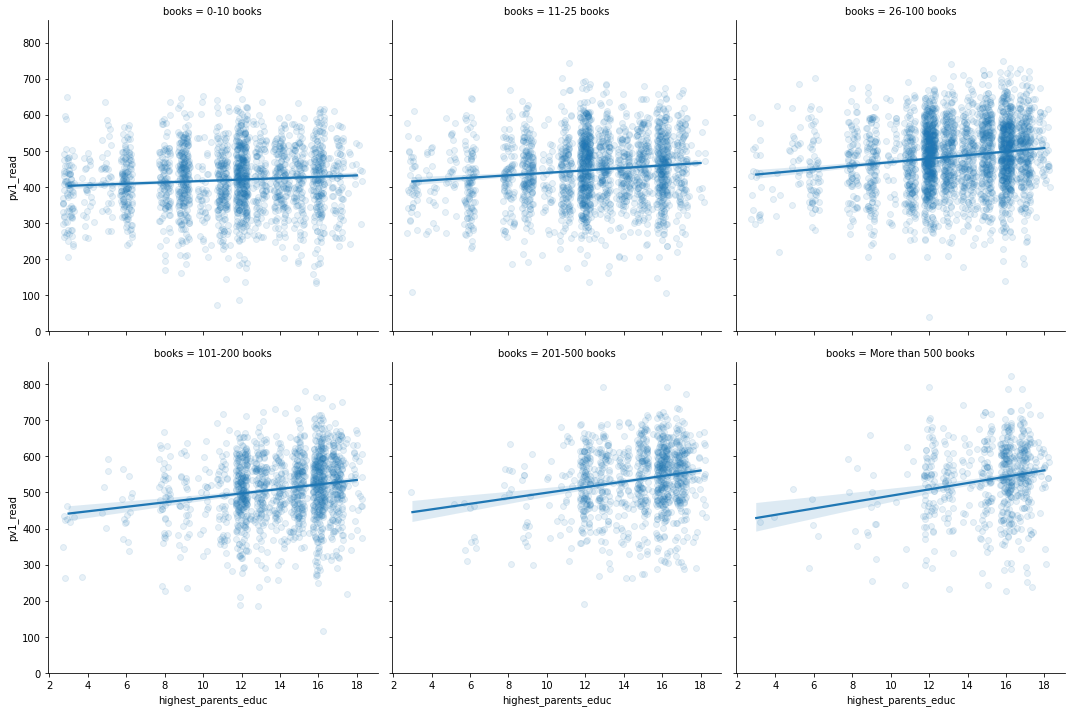

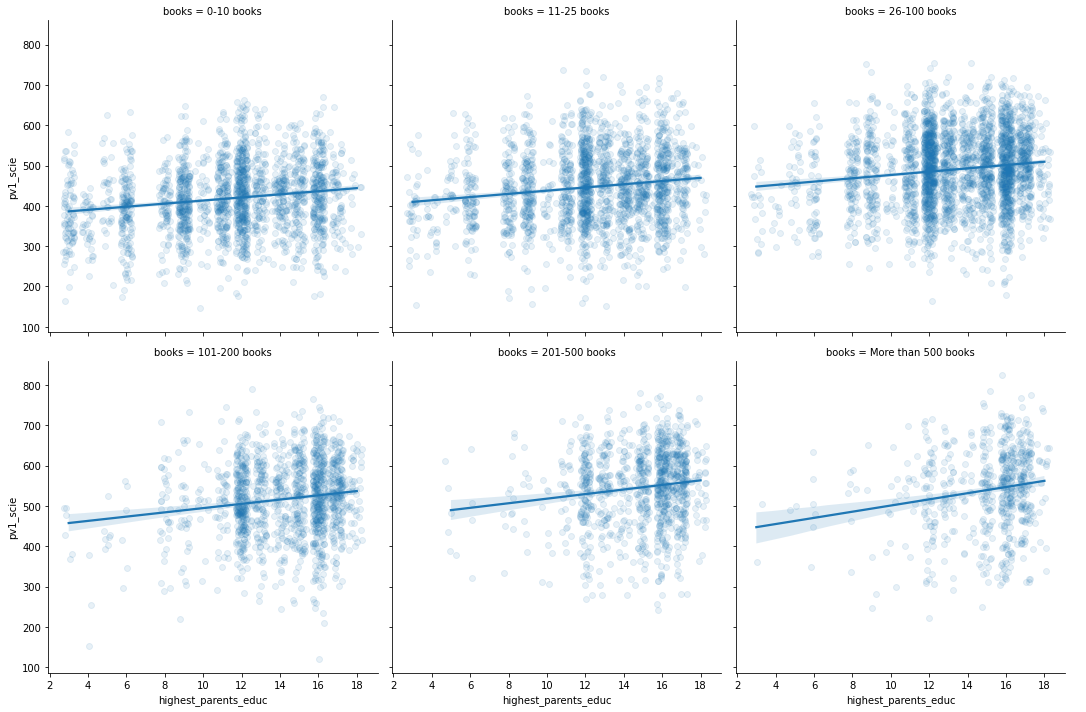

In [87]:
for subject in subjects:
    g = sns.FacetGrid(data=df.sample(10000), col="books", height=5, col_wrap=3)
    g.map(sns.regplot, "highest_parents_educ", f"pv1_{subject}", x_jitter=0.3, scatter_kws={"alpha":1/10})
    g.add_legend();

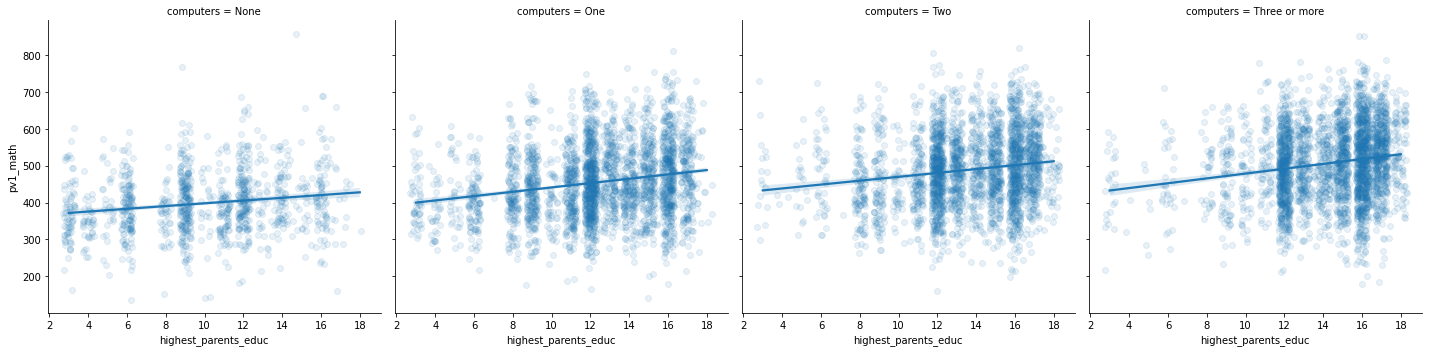

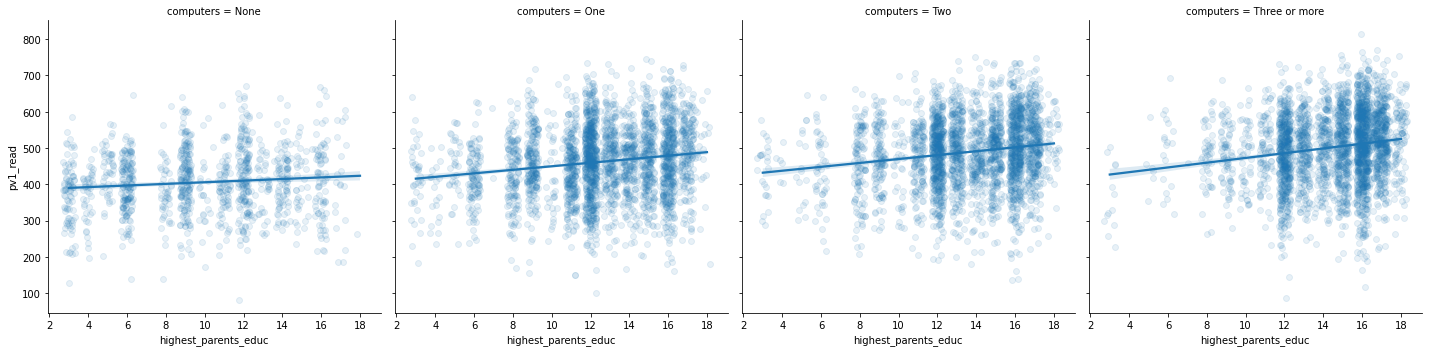

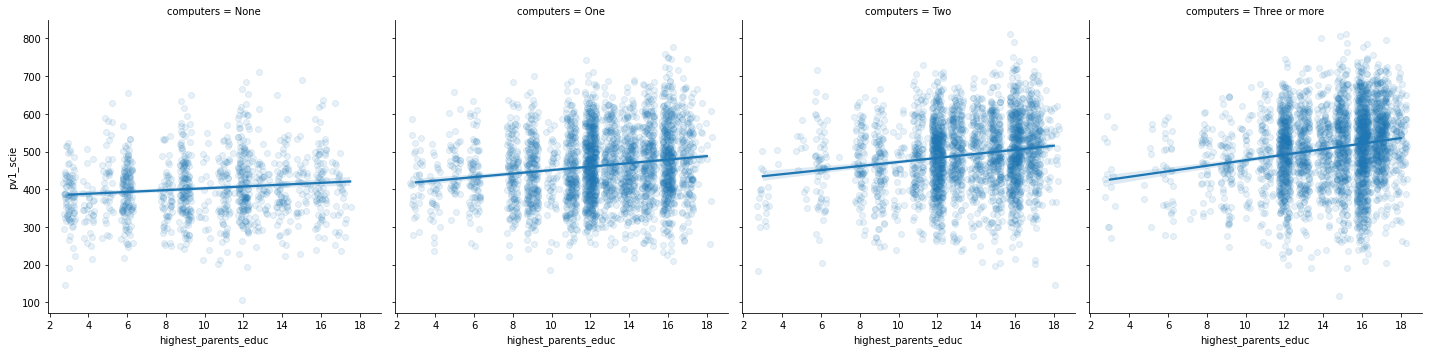

In [88]:
for subject in subjects:
    g = sns.FacetGrid(data=df.sample(10000), col="computers", height=5, col_wrap=4)
    g.map(sns.regplot, "highest_parents_educ", f"pv1_{subject}", x_jitter=0.3, scatter_kws={"alpha":1/10})
    g.add_legend();

In each of the faceted scatter plots of the three subjects (math, reading, and science) in both categorical variables, computers and books, as the level of the ordinal variable increases, the slope of the regression line increases too.

Let's move on to looking at how being a OECD country impacts the relationship between the plausible values and the highest parental occupational status. In order to make the plots clearer and render faster, I'll use a sample of 1,000 students.

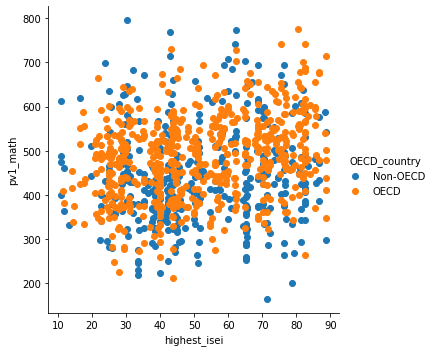

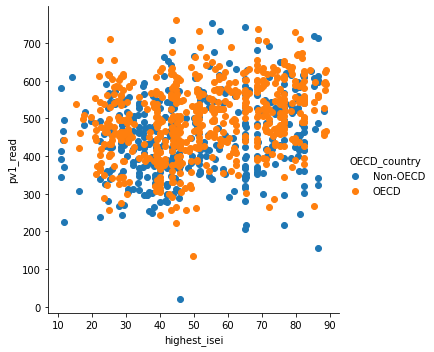

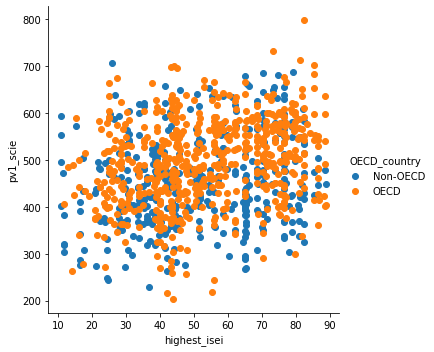

In [89]:
for subject in subjects:
    g = sns.FacetGrid(data=df.sample(1000), hue="OECD_country", height=5)
    g.map(plt.scatter, "highest_isei", f"pv1_{subject}")
    g.add_legend()

In each of the three scatter plots, it's possible to see a greater concentration of OECD countries at the top right corner, which means higher values of plausible values and parental ISEI.

Now, let's see the same visualizations, but with the highest parental education in years instead of the highest parental ISEI.

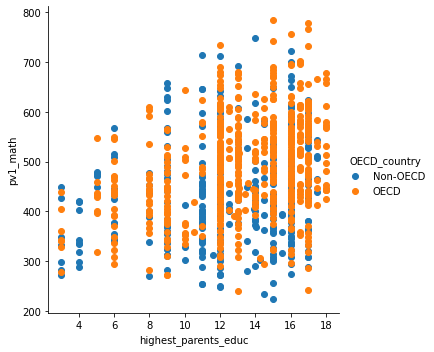

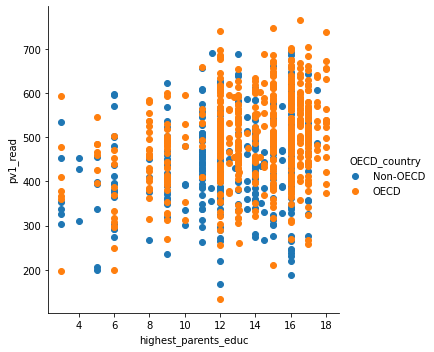

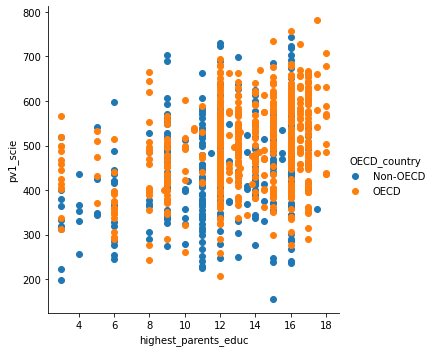

In [90]:
for subject in subjects:
    g = sns.FacetGrid(data=df.sample(1000), hue="OECD_country", height=5)
    g.map(plt.scatter, "highest_parents_educ", f"pv1_{subject}")
    g.add_legend()

Reproducing the same plots with the highest parental education in years, instead of the highest parental occupational status, shows, again, a trend of a greater concentration of OECD countries at the top right corner, which means higher values of plausible values and parental years of education.

Now, let's see how the relationship between the average of the plausible values and the highest parental ISEI is influenced by the number of books at home. 

In [91]:
def MultiIndex_Grouped_df(df, subject, bin_edges, col_binned, col_binned_name, cat_column):
    """Create a multi index dataframe of the mean and standard deviation of each subject in subjects."""
    
    index = pd.MultiIndex.from_product([col_binned.unique(), df[cat_column].unique()], names=[col_binned_name, cat_column])
    
    df_mean = pd.DataFrame(index=index)
    df_std = pd.DataFrame(index=index)
    for i in range(1, 6):
        df_mean[f"pv{i}_{subject}"] = df.groupby([col_binned, cat_column])[f"pv{i}_{subject}"].mean()
        df_std[f"pv{i}_{subject}"] = df.groupby([col_binned, cat_column])[f"pv{i}_{subject}"].std()

    df_mean[subject] = [np.mean(row) for row in zip(df_mean.to_numpy())]
    df_std[subject] = [np.mean(row) for row in zip(df_std.to_numpy())]
    
    df_mean = df_mean.sort_values(by=col_binned_name)
    df_std = df_std.sort_values(by=col_binned_name)
    
    return (df_mean, df_std)

In [92]:
bin_size = 5
bin_edges = np.arange(10, df.highest_isei.max()+bin_size, bin_size)
bin_centers = bin_edges[:-1]+bin_size/2

isei_binned = pd.cut(df.highest_isei, bin_edges, include_lowest=True)

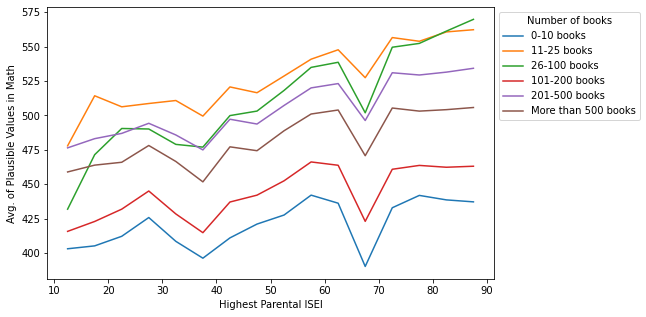

In [93]:
subject = "math"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, isei_binned, "highest_isei", "books")
plt.figure(figsize=[8,5])
for book in df.books.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"books == '{book}'")[subject])

plt.xlabel("Highest Parental ISEI")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.books.unique().sort_values(), title="Number of books", bbox_to_anchor=(1,1));

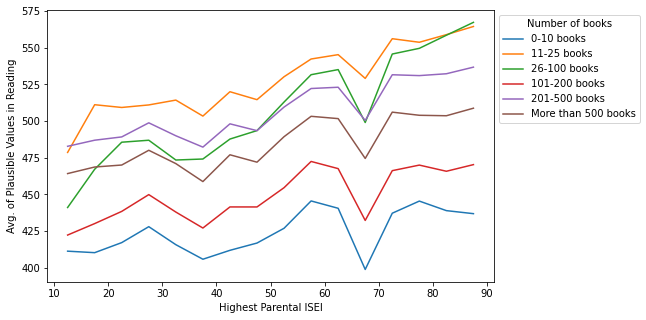

In [94]:
subject = "read"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, isei_binned, "highest_isei", "books")
plt.figure(figsize=[8,5])
for book in df.books.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"books == '{book}'")[subject])

plt.xlabel("Highest Parental ISEI")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.books.unique().sort_values(), title="Number of books", bbox_to_anchor=(1,1));

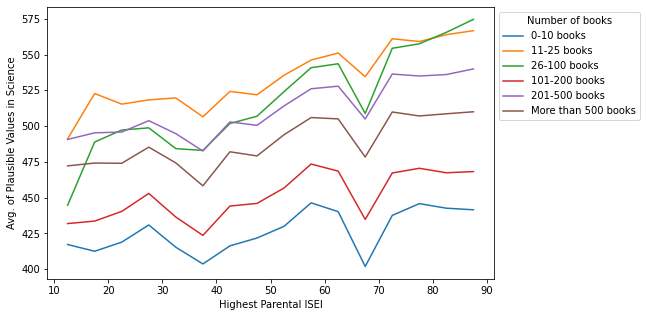

In [95]:
subject = "scie"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, isei_binned, "highest_isei", "books")
plt.figure(figsize=[8,5])
for book in df.books.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"books == '{book}'")[subject])

plt.xlabel("Highest Parental ISEI")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.books.unique().sort_values(), title="Number of books", bbox_to_anchor=(1,1));

Students who have fewer than 10 books at home have the lowest averages in each one of the subjects, regardless of the parental ISEI.

Next, I'll use the same approach as before, but, instead of the number of books at home, I'll use the number of computers.

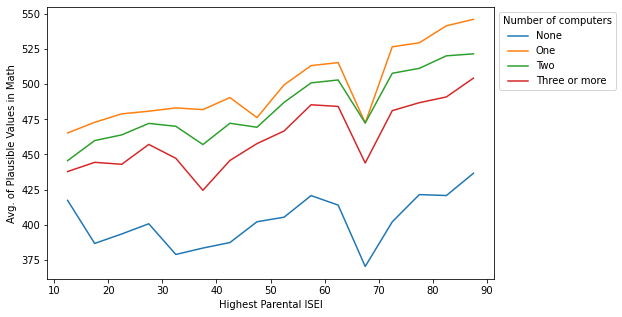

In [96]:
subject = "math"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, isei_binned, "highest_isei", "computers")
plt.figure(figsize=[8,5])
for computer in df.computers.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"computers == '{computer}'")[subject])

plt.xlabel("Highest Parental ISEI")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.computers.unique().sort_values(), title="Number of computers", bbox_to_anchor=(1,1));

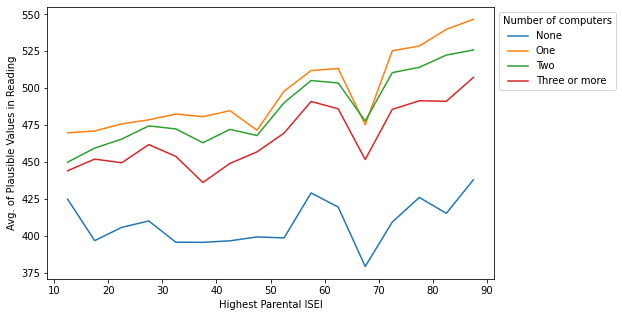

In [97]:
subject = "read"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, isei_binned, "highest_isei", "computers")
plt.figure(figsize=[8,5])
for computer in df.computers.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"computers == '{computer}'")[subject])

plt.xlabel("Highest Parental ISEI")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.computers.unique().sort_values(), title="Number of computers", bbox_to_anchor=(1,1));

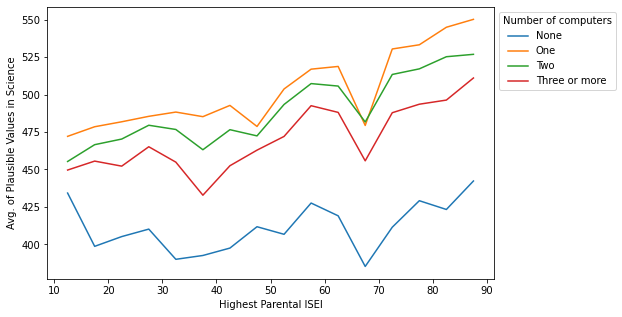

In [98]:
subject = "scie"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, isei_binned, "highest_isei", "computers")
plt.figure(figsize=[8,5])
for computer in df.computers.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"computers == '{computer}'")[subject])

plt.xlabel("Highest Parental ISEI")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.computers.unique().sort_values(), title="Number of computers", bbox_to_anchor=(1,1));

Students who don't have any computer at home have the lowest averages in each one of the subjects, regardless of the parental ISEI.

Now, instead of using the highest parental ISEI, I'll use the highest parental education in years.

In [99]:
bin_size = 2
bin_edges = np.arange(2, df.highest_parents_educ.max()+bin_size, bin_size)
bin_centers = bin_edges[:-1]+bin_size/2

educ_binned = pd.cut(df.highest_parents_educ, bin_edges, include_lowest=True)

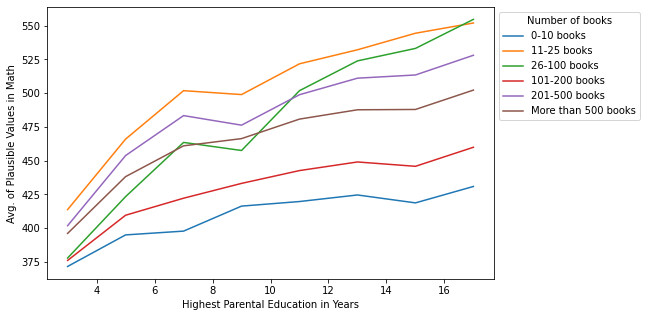

In [100]:
subject = "math"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, educ_binned, "highest_parents_educ", "books")
plt.figure(figsize=[8,5])
for book in df.books.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"books == '{book}'")[subject])

plt.xlabel("Highest Parental Education in Years")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.books.unique().sort_values(), title="Number of books", bbox_to_anchor=(1,1));

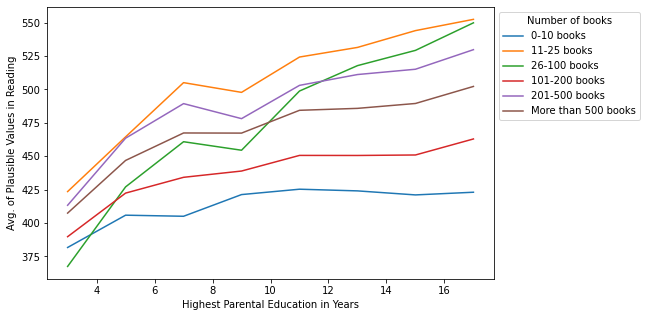

In [101]:
subject = "read"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, educ_binned, "highest_parents_educ", "books")
plt.figure(figsize=[8,5])
for book in df.books.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"books == '{book}'")[subject])

plt.xlabel("Highest Parental Education in Years")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.books.unique().sort_values(), title="Number of books", bbox_to_anchor=(1,1));

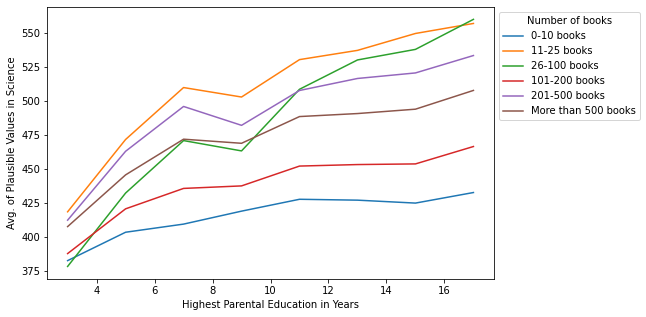

In [102]:
subject = "scie"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, educ_binned, "highest_parents_educ", "books")
plt.figure(figsize=[8,5])
for book in df.books.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"books == '{book}'")[subject])

plt.xlabel("Highest Parental Education in Years")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.books.unique().sort_values(), title="Number of books", bbox_to_anchor=(1,1));

Again, regardless of the parents' years of education, students who have fewer than 10 books at home have the lowest averages in each subject.

Next, I'll use the same approach as before, but, instead of the number of books at home, I'll use the number of computers.

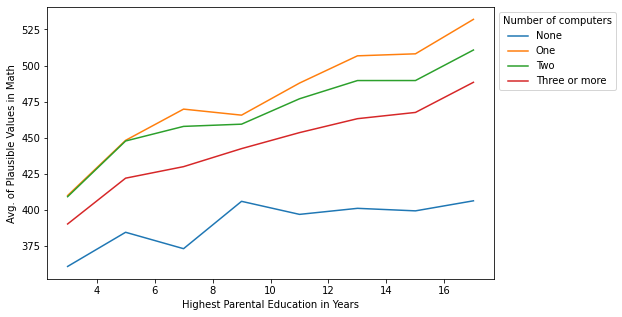

In [103]:
subject = "math"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, educ_binned, "highest_parents_educ", "computers")
plt.figure(figsize=[8,5])
for computer in df.computers.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"computers == '{computer}'")[subject])

plt.xlabel("Highest Parental Education in Years")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.computers.unique().sort_values(), title="Number of computers", bbox_to_anchor=(1,1));

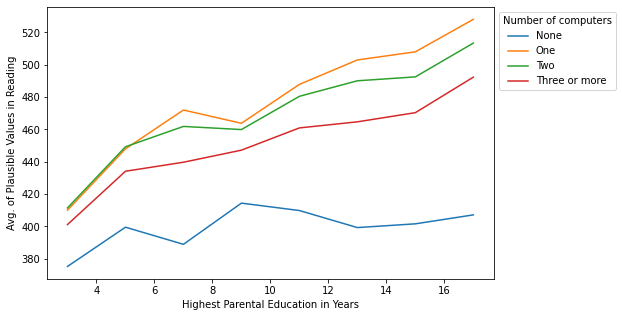

In [104]:
subject = "read"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, educ_binned, "highest_parents_educ", "computers")
plt.figure(figsize=[8,5])
for computer in df.computers.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"computers == '{computer}'")[subject])

plt.xlabel("Highest Parental Education in Years")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.computers.unique().sort_values(), title="Number of computers", bbox_to_anchor=(1,1));

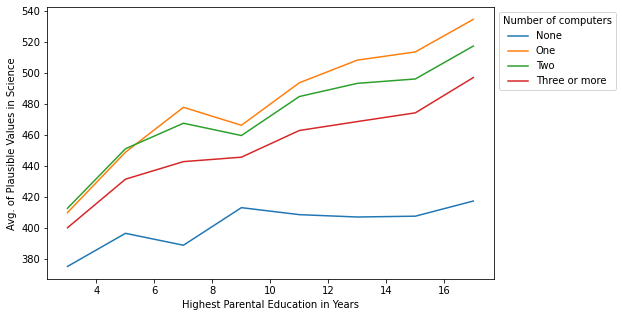

In [105]:
subject = "scie"
df_mean, df_std = MultiIndex_Grouped_df(df, subject, bin_edges, educ_binned, "highest_parents_educ", "computers")
plt.figure(figsize=[8,5])
for computer in df.computers.unique():
    plt.errorbar(x=bin_centers, y=df_mean.query(f"computers == '{computer}'")[subject])

plt.xlabel("Highest Parental Education in Years")
plt.ylabel(f"Avg. of Plausible Values in {subjects[subject]}")
plt.legend(df.computers.unique().sort_values(), title="Number of computers", bbox_to_anchor=(1,1));

And again, students who don't have any computer at home have the lowest averages in every single subject, regardless of their parents' years of education.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation on how the categorical variables, books and computers, play into the relationship between the parents' situation (highest parental ISEI and highest parental education in years) and the plausible values that their children took in the PISA 2012. The multivariate exploration here showed that there indeed is a positive effect of increased number of books or computers on the plausible values when the highest parental ISEI or highest parental education in years increase.

Looking at how being a OECD country impacts the relationship between the plausible values and the highest parental ISEI/the highest parental education in years, shows a greater concentration of OECD countries at the top right corners of the scatter plots, which means higher values of plausible values and parental ISEI / parents' years of education.

Finally, I investigated how the relationship between the average of the plausible values and the highest parental ISEI / highest parental education in years, is influenced by the number of computers or books at home. Regardless of the increase of the two numeric variables, the average of the plausible values is lower for students who don't have any computer or have fewer than 10 books at home.

### Were there any interesting or surprising interactions between features?

Looking back on the line plots, students who have between 11 and 25 books seems to be better at school than students who have many more books. This point was surprise to me.

<a name="ref"></a>
## References

- [PISA Data Analysis Manual: SPSS® SECOND EDITION](https://www.oecd-ilibrary.org/education/pisa-data-analysis-manual-sas-second-edition_9789264056251-en)
- [PISA 2012 Technical Report](https://www.oecd.org/pisa/data/pisa2012technicalreport.htm)
- [Glossary Of Statistical Terms - OECD](https://stats.oecd.org/glossary)
- [Geopandas: Mapping and Plotting Tools](https://geopandas.org/docs/user_guide/mapping.html)
- [Data Visualization: How To Plot A Map with Geopandas in Python?](https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b)
- [How to iterate over rows in a DataFrame in Pandas?](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas/55557758#55557758)